In [1]:
%load_ext Cython

In [2]:
%%cython
from draculab import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
from numpy import sin, cos
%matplotlib notebook
import time

In [4]:
## SETTING THE NETWORK ##

class spinal_cord():
    
    def antagonist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1,
                          alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the antagonist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
                                              'delays' : 0.005}
        self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def antagonist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                               alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
                         self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
                         self.r_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
                         self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
                                  self.alpha_muscle1_2_arm_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
                                   self.arm_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
                                   self.arm_2_pn_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
                                   self.arm_2_ia_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
                                   self.arm_2_ib_muscle1_syn_spec)

        self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
                         self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
                         self.r_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
                         self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
                                  self.alpha_muscle2_2_arm_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
                                   self.arm_2_alpha_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
                                   self.arm_2_pn_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
                                   self.arm_2_ia_muscle2_syn_spec)
        self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
                                   self.arm_2_ib_muscle2_syn_spec)

    def synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                         alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        #self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        #self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = exc_aff_syn
        #self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        #self.ib_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        #self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        #self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = exc_aff_syn
        #self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        #self.ib_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        #self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        #self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        #self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        #self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_r_muscle2_conn_spec = conn_spec
        #self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        #self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        #self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        #self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        #self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        #self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        #self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_r_muscle1_conn_spec = conn_spec
        #self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        #self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                              alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        #self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
        #                 self.alpha_muscle1_2_r_muscle1_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
        #                          self.alpha_muscle1_2_arm_syn_spec)
        #self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        #self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.r_muscle1_2_alpha_muscle1_syn_spec)
        #self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
        #                 self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, r_muscle2, self.r_muscle1_2_r_muscle2_conn_spec, 
                         self.r_muscle1_2_r_muscle2_syn_spec)
        #self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
        #                           self.arm_2_alpha_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
        #                           self.arm_2_pn_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
        #                           self.arm_2_ia_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
        #                           self.arm_2_ib_muscle1_syn_spec)

        #self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
        #                 self.alpha_muscle2_2_r_muscle2_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
        #                          self.alpha_muscle2_2_arm_syn_spec)
        #self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        #self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.r_muscle2_2_alpha_muscle2_syn_spec)
        #self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
        #                 self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, r_muscle1, self.r_muscle2_2_r_muscle1_conn_spec, 
                         self.r_muscle2_2_r_muscle1_syn_spec)
        #self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
        #                           self.arm_2_alpha_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
        #                           self.arm_2_pn_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
        #                           self.arm_2_ia_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
        #                           self.arm_2_ib_muscle2_syn_spec)
    
    def partial_synergist_params(self, alpha_port_muscle1, Ia_port_muscle1, II_port_muscle1, Ib_port_muscle1, 
                                 alpha_port_muscle2, Ia_port_muscle2, II_port_muscle2, Ib_port_muscle2):
    #Create parameter dictionaries for the partial synergist synapses and connections
        
        # Excitatory afferent synapse dictionary
        exc_aff_syn = {'init_w' : 2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Inhibitory afferent synapse dictionary
        inh_aff_syn = {'init_w' : -2.,
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        # Selective afferent synapse dictionary
        sel_aff_syn = {'init_w' : {'distribution':'uniform', 'low':-2, 'high':2},
                       'type' : synapse_types.static,
                       'inp_ports' : [0]}
        
        #self.alpha_muscle1_2_r_muscle1_syn_spec = exc_aff_syn
        self.alpha_muscle1_2_r_muscle2_syn_spec = exc_aff_syn
        #self.alpha_muscle1_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle1_2_alpha_muscle1_syn_spec = exc_aff_syn
        self.pn_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ia_muscle1_2_ia_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle1_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle1_2_ia_muscle1_syn_spec = inh_aff_syn
        self.r_muscle1_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.ib_muscle1_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle1_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle1_2_ib_muscle2_syn_spec = sel_aff_syn
        #self.arm_2_alpha_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle1_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle1_syn_spec = exc_aff_syn

        #self.alpha_muscle2_2_r_muscle2_syn_spec = exc_aff_syn
        self.alpha_muscle2_2_r_muscle1_syn_spec = exc_aff_syn
        #self.alpha_muscle2_2_arm_syn_spec = exc_aff_syn
        #self.pn_muscle2_2_alpha_muscle2_syn_spec = exc_aff_syn
        self.pn_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ia_muscle2_2_ia_muscle1_syn_spec = inh_aff_syn
        #self.r_muscle2_2_alpha_muscle2_syn_spec = inh_aff_syn
        #self.r_muscle2_2_ia_muscle2_syn_spec = inh_aff_syn
        self.r_muscle2_2_alpha_muscle1_syn_spec = inh_aff_syn
        #self.ib_muscle2_2_alpha_muscle2_syn_spec = sel_aff_syn
        self.ib_muscle2_2_alpha_muscle1_syn_spec = sel_aff_syn
        self.ib_muscle2_2_ib_muscle1_syn_spec = sel_aff_syn
        #self.arm_2_alpha_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_pn_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ia_muscle2_syn_spec = exc_aff_syn
        #self.arm_2_ib_muscle2_syn_spec = exc_aff_syn
        
        # Connection dictionary
        conn_spec = {'rule' : 'one_to_one',
                     'delay' : 0.005}

        #self.alpha_muscle1_2_r_muscle1_conn_spec = conn_spec
        self.alpha_muscle1_2_r_muscle2_conn_spec = conn_spec
        #self.alpha_muscle1_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle1],'delays' : 0.005}
        #self.pn_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.pn_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ia_muscle1_2_ia_muscle2_conn_spec = conn_spec
        #self.r_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        #self.r_muscle1_2_ia_muscle1_conn_spec = conn_spec
        self.r_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        #self.ib_muscle1_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle1_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle1_2_ib_muscle2_conn_spec = conn_spec
        #self.arm_2_alpha_muscle1_conn_spec = {'port_map' : [(II_port_muscle1,0), (Ia_port_muscle1,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0), (Ib_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle1_conn_spec = {'port_map' : [(Ia_port_muscle1,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle1_conn_spec = {'port_map' : [(Ib_port_muscle1,0)], 'delays' : 0.005}

        #self.alpha_muscle2_2_r_muscle2_conn_spec = conn_spec
        self.alpha_muscle2_2_r_muscle1_conn_spec = conn_spec
        #self.alpha_muscle2_2_arm_conn_spec = {'inp_ports' : [alpha_port_muscle2],'delays' : 0.005}
        #self.pn_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.pn_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ia_muscle2_2_ia_muscle1_conn_spec = conn_spec
        #self.r_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        #self.r_muscle2_2_ia_muscle2_conn_spec = conn_spec
        self.r_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        #self.ib_muscle2_2_alpha_muscle2_conn_spec = conn_spec
        self.ib_muscle2_2_alpha_muscle1_conn_spec = conn_spec
        self.ib_muscle2_2_ib_muscle1_conn_spec = conn_spec
        #self.arm_2_alpha_muscle2_conn_spec = {'port_map' : [(II_port_muscle2,0), (Ia_port_muscle2,0)], 
        #                                      'delays' : 0.005}
        #self.arm_2_pn_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0), (Ib_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ia_muscle2_conn_spec = {'port_map' : [(Ia_port_muscle2,0)], 'delays' : 0.005}
        #self.arm_2_ib_muscle2_conn_spec = {'port_map' : [(Ib_port_muscle2,0)], 'delays' : 0.005}
        
    def partial_synergist_connections(self, alpha_muscle1, ia_muscle1, ib_muscle1, pn_muscle1, r_muscle1, 
                                      alpha_muscle2, ia_muscle2, ib_muscle2, pn_muscle2, r_muscle2):
        
        #self.net.connect(alpha_muscle1, r_muscle1, self.alpha_muscle1_2_r_muscle1_conn_spec, 
        #                 self.alpha_muscle1_2_r_muscle1_syn_spec)
        self.net.connect(alpha_muscle1, r_muscle2, self.alpha_muscle1_2_r_muscle2_conn_spec, 
                         self.alpha_muscle1_2_r_muscle2_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle1, self.arm, self.alpha_muscle1_2_arm_conn_spec, 
        #                          self.alpha_muscle1_2_arm_syn_spec)
        #self.net.connect(pn_muscle1, alpha_muscle1, self.pn_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.pn_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(pn_muscle1, alpha_muscle2, self.pn_muscle1_2_alpha_muscle2_conn_spec, 
                         self.pn_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, alpha_muscle2, self.ia_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ia_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ia_muscle1, ia_muscle2, self.ia_muscle1_2_ia_muscle2_conn_spec, 
                         self.ia_muscle1_2_ia_muscle2_syn_spec)
        #self.net.connect(r_muscle1, alpha_muscle1, self.r_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.r_muscle1_2_alpha_muscle1_syn_spec)
        #self.net.connect(r_muscle1, ia_muscle1, self.r_muscle1_2_ia_muscle1_conn_spec, 
        #                 self.r_muscle1_2_ia_muscle1_syn_spec)
        self.net.connect(r_muscle1, alpha_muscle2, self.r_muscle1_2_alpha_muscle2_conn_spec, 
                         self.r_muscle1_2_alpha_muscle2_syn_spec)
        #self.net.connect(ib_muscle1, alpha_muscle1, self.ib_muscle1_2_alpha_muscle1_conn_spec, 
        #                 self.ib_muscle1_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle1, alpha_muscle2, self.ib_muscle1_2_alpha_muscle2_conn_spec, 
                         self.ib_muscle1_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle1, ib_muscle2, self.ib_muscle1_2_ib_muscle2_conn_spec, 
                         self.ib_muscle1_2_ib_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle1, self.arm_2_alpha_muscle1_conn_spec, 
        #                           self.arm_2_alpha_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle1, self.arm_2_pn_muscle1_conn_spec, 
        #                           self.arm_2_pn_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle1, self.arm_2_ia_muscle1_conn_spec, 
        #                           self.arm_2_ia_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle1, self.arm_2_ib_muscle1_conn_spec, 
        #                           self.arm_2_ib_muscle1_syn_spec)

        #self.net.connect(alpha_muscle2, r_muscle2, self.alpha_muscle2_2_r_muscle2_conn_spec, 
        #                 self.alpha_muscle2_2_r_muscle2_syn_spec)
        self.net.connect(alpha_muscle2, r_muscle1, self.alpha_muscle2_2_r_muscle1_conn_spec, 
                         self.alpha_muscle2_2_r_muscle1_syn_spec)
        #self.net.set_plant_inputs(alpha_muscle2, self.arm, self.alpha_muscle2_2_arm_conn_spec, 
        #                          self.alpha_muscle2_2_arm_syn_spec)
        #self.net.connect(pn_muscle2, alpha_muscle2, self.pn_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.pn_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(pn_muscle2, alpha_muscle1, self.pn_muscle2_2_alpha_muscle1_conn_spec, 
                         self.pn_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, alpha_muscle1, self.ia_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ia_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ia_muscle2, ia_muscle1, self.ia_muscle2_2_ia_muscle1_conn_spec, 
                         self.ia_muscle2_2_ia_muscle1_syn_spec)
        #self.net.connect(r_muscle2, alpha_muscle2, self.r_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.r_muscle2_2_alpha_muscle2_syn_spec)
        #self.net.connect(r_muscle2, ia_muscle2, self.r_muscle2_2_ia_muscle2_conn_spec, 
        #                 self.r_muscle2_2_ia_muscle2_syn_spec)
        self.net.connect(r_muscle2, alpha_muscle1, self.r_muscle2_2_alpha_muscle1_conn_spec, 
                         self.r_muscle2_2_alpha_muscle1_syn_spec)
        #self.net.connect(ib_muscle2, alpha_muscle2, self.ib_muscle2_2_alpha_muscle2_conn_spec, 
        #                 self.ib_muscle2_2_alpha_muscle2_syn_spec)
        self.net.connect(ib_muscle2, alpha_muscle1, self.ib_muscle2_2_alpha_muscle1_conn_spec, 
                         self.ib_muscle2_2_alpha_muscle1_syn_spec)
        self.net.connect(ib_muscle2, ib_muscle1, self.ib_muscle2_2_ib_muscle1_conn_spec, 
                         self.ib_muscle2_2_ib_muscle1_syn_spec)
        #self.net.set_plant_outputs(self.arm, alpha_muscle2, self.arm_2_alpha_muscle2_conn_spec, 
        #                           self.arm_2_alpha_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, pn_muscle2, self.arm_2_pn_muscle2_conn_spec, 
        #                           self.arm_2_pn_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ia_muscle2, self.arm_2_ia_muscle2_conn_spec, 
        #                           self.arm_2_ia_muscle2_syn_spec)
        #self.net.set_plant_outputs(self.arm, ib_muscle2, self.arm_2_ib_muscle2_conn_spec, 
        #                           self.arm_2_ib_muscle2_syn_spec)
    
    def __init__(self):
        
    ########### Fixing random seed
    
        self.seed = 19680801
        np.random.seed(self.seed)
        
    ########### Create parameter dictionaries for network, plant, and units
    
        # Defining network parameters
        self.net_params = {'min_delay': 0.005,
                           'min_buff_size': 10}

        # Defining neurons' parameters
        
        # Neurons' dictionary
        neuron_params = {'type' : unit_types.presyn_inh_sig,
                         'init_val' : 0.,
                         'thresh' : .5,
                         'slope' : 11.,
                         'tau' : 0.02,
                         'HYP' : 2.,
                         'OD' : 2.}
        ia_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        alpha_params = {'type' : unit_types.presyn_inh_sig,
                        'init_val' : 0.,
                        'thresh' : 0.8,
                        'slope' : 5.,
                        'tau' : 0.02,
                        'HYP' : 2.,
                        'OD' : 2.}
        ib_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 2.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        pn_params = {'type' : unit_types.presyn_inh_sig,
                     'init_val' : 0.,
                     'thresh' : 1.,
                     'slope' : 3.,
                     'tau' : 0.02,
                     'HYP' : 2.,
                     'OD' : 2.}
        
        
        # Muscle 1 neurons
        self.alpha_1_params = alpha_params
        self.pn_1_params = pn_params
        self.ia_1_params = ia_params
        self.r_1_params = neuron_params
        self.ib_1_params = ib_params
        
        # Muscle 2 neurons
        self.alpha_2_params = alpha_params
        self.pn_2_params = pn_params
        self.ia_2_params = ia_params
        self.r_2_params = neuron_params
        self.ib_2_params = ib_params
        
        # Muscle 3 neurons
        self.alpha_3_params = alpha_params
        self.pn_3_params = pn_params
        self.ia_3_params = ia_params
        self.r_3_params = neuron_params
        self.ib_3_params = ib_params
        
        # Muscle 4 neurons
        self.alpha_4_params = alpha_params
        self.pn_4_params = pn_params
        self.ia_4_params = ia_params
        self.r_4_params = neuron_params
        self.ib_4_params = ib_params
        
        # Muscle 5 neurons
        self.alpha_5_params = alpha_params
        self.pn_5_params = pn_params
        self.ia_5_params = ia_params
        self.r_5_params = neuron_params
        self.ib_5_params = ib_params
        
        # Muscle 6 neurons
        self.alpha_6_params = alpha_params
        self.pn_6_params = pn_params
        self.ia_6_params = ia_params
        self.r_6_params = neuron_params
        self.ib_6_params = ib_params

        # Defining arm parameters
        self.arm_params = {'type': plant_models.planar_arm_v3,
                           'mass1': 1.,
                           'mass2': 1.,
                           'init_q1': 0.,
                           'init_q2': np.pi/2.,
                           'init_q1p': 0.,
                           'init_q2p': 0.,
                           'g': 0.0,
                           'mu1': 0.01,
                           'mu2': 0.01,
                           
                           #'s_min' : -0.4,
                           #'p1' : (-0.01, 0.04),
                           #'p2' : (0.29, 0.03),
                           #'p3' : (0., 0.05),
                           #'p5' : (0.01, -0.05),
                           #'p10': (0.29, 0.03),
                           #'l_torque' : 0.01,
                           #'l_visco' : 0.01,
                           'g_e': 20.,
                           #'l0_e' : [1.]*6,
                           #'Ia_gain' : 2.5*np.array([3.,10.,10., 3.,10.,10.]),
                           #'II_gain' : 2.*np.array([3., 8., 8., 3., 8., 8.]),
                           #'Ib_gain' : 5.,
                           #'T_0' : .5,
                           'k_pe_e': 8.,
                           'k_se_e': 13.,
                           #'b_e' : 5.,
                           #'g_s' : 0.02,
                           #'k_pe_s' : 2., 
                           #'k_se_s' : 2.,
                           #'g_d' : 0.01,
                           #'k_pe_d' : .2, #.1,
                           #'k_se_d' : 1., #2.,
                           #'b_s' : .5,
                           #'b_d' : 2.,#3.,
                           #'l0_s': .7,
                           #'l0_d': .8,
                           #'fs' : 0.1,
                           #'se_II' : 0.5,
                           #'cd' : 0.5,
                           #'cs' : 0.5
                          }
        
        # Defining sources' parameters
        self.source_params = {'init_val' : 1.,
                              'type' : unit_types.source,
                              'function' : lambda x: 1.}
        
    ########### Create parameter dictionaries for the synapses and connections
    
        '''    
        # Defining synapses' and connections' specifications to neurons and plant
        
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(0, 5, 6, 7, 9, 17, 18, 19)
        # Muscle 2 - muscle 3
        self.antagonist_params(3, 9, 10, 11, 6, 13, 14, 15)
        # Muscle 5 - muscle 6
        self.antagonist_params(12, 21, 22, 23, 15, 25, 26, 27)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(0, 5, 6, 7, 3, 9, 10, 11)
        # Muscle 1 - muscle 5
        self.synergist_params(0, 5, 6, 7, 12, 21, 22, 23)
        # Muscle 4 - muscle 3
        self.synergist_params(9, 17, 18, 19, 6, 13, 14, 15)
        # Muscle 4 - muscle 6
        self.synergist_params(9, 17, 18, 19, 15, 25, 26, 27)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(3, 9, 10, 11, 12, 21, 22, 23)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(3, 9, 10, 11, 15, 25, 26, 27)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(6, 13, 14, 15, 12, 21, 22, 23)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(6, 13, 14, 15, 15, 25, 26, 27)
        '''
        
        # Defining synapses' specifications to source units

        # PC synapse dictionary
        self.pc_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [1]}
        # IC synapse dictionary
        self.ic_syn = {'init_w' : {'distribution':'uniform', 'low':-0.2, 'high':0.2},
                       'type' : synapse_types.static,
                       'inp_ports' : [2, 2, 2, 2]}   
        
        # Defining connections' specifications to source units

        # PC Connection dictionary
        self.pc_conn_spec = {'rule' : 'one_to_one',
                             'delay' : 0.005}
        # IC connection dictionary 
        self.ic_conn_spec = {'rule' : 'all_to_all',
                             'delay' : 0.005}
        
    def initialize(self):
        
        np.random.seed(self.seed)
        
    ########### Create network, neurons and plant

        self.net = network(self.net_params)
        
        alpha_1 = self.net.create(1, self.alpha_1_params)
        pn_1 = self.net.create(1, self.pn_1_params)
        ia_1 = self.net.create(1, self.ia_1_params)
        r_1 = self.net.create(1, self.r_1_params)
        ib_1 = self.net.create(1, self.ib_1_params)
        self.m1_ids = alpha_1 + pn_1 + ia_1 + r_1 + ib_1
        
        alpha_2 = self.net.create(1, self.alpha_2_params)
        pn_2 = self.net.create(1, self.pn_2_params)
        ia_2 = self.net.create(1, self.ia_2_params)
        r_2 = self.net.create(1, self.r_2_params)
        ib_2 = self.net.create(1, self.ib_2_params)
        self.m2_ids = alpha_2 + pn_2 + ia_2 + r_2 + ib_2
        
        alpha_3 = self.net.create(1, self.alpha_3_params)
        pn_3 = self.net.create(1, self.pn_3_params)
        ia_3 = self.net.create(1, self.ia_3_params)
        r_3 = self.net.create(1, self.r_3_params)
        ib_3 = self.net.create(1, self.ib_3_params)
        self.m3_ids = alpha_3 + pn_3 + ia_3 + r_3 + ib_3
        
        alpha_4 = self.net.create(1, self.alpha_4_params)
        pn_4 = self.net.create(1, self.pn_4_params)
        ia_4 = self.net.create(1, self.ia_4_params)
        r_4 = self.net.create(1, self.r_4_params)
        ib_4 = self.net.create(1, self.ib_4_params)
        self.m4_ids = alpha_4 + pn_4 + ia_4 + r_4 + ib_4
        
        alpha_5 = self.net.create(1, self.alpha_5_params)
        pn_5 = self.net.create(1, self.pn_5_params)
        ia_5 = self.net.create(1, self.ia_5_params)
        r_5 = self.net.create(1, self.r_5_params)
        ib_5 = self.net.create(1, self.ib_5_params)
        self.m5_ids = alpha_5 + pn_5 + ia_5 + r_5 + ib_5
        
        alpha_6 = self.net.create(1, self.alpha_6_params)
        pn_6 = self.net.create(1, self.pn_6_params)
        ia_6 = self.net.create(1, self.ia_6_params)
        r_6 = self.net.create(1, self.r_6_params)
        ib_6 = self.net.create(1, self.ib_6_params)
        self.m6_ids = alpha_6 + pn_6 + ia_6 + r_6 + ib_6
        
        self.arm = self.net.create(1, self.arm_params)

    ########### Connect
    
        #Creating lists with port numbers
        alpha_port = range(0,6)
        ia_port = range(28,34)
        ii_port = range(34,40)
        ib_port = range(22,28)
    
        ## Antagonist connections
        # Muscle 1 - muscle 4
        self.antagonist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[3], ia_port[3], 
                               ii_port[3], ib_port[3])
        #self.antagonist_params(0, 28, 34, 22, 3, 31, 37, 25)
        self.antagonist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_4, ia_4, ib_4, pn_4, r_4)
        # Muscle 2 - muscle 3
        self.antagonist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.antagonist_params(1, 29, 35, 23, 2, 30, 36, 24)
        self.antagonist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 5 - muscle 6
        self.antagonist_params(alpha_port[4], ia_port[4], ii_port[4], ib_port[4], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.antagonist_params(4, 32, 38, 26, 5, 33, 39, 27)
        self.antagonist_connections(alpha_5, ia_5, ib_5, pn_5, r_5, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Synergist connections
        # Muscle 1 - muscle 2
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[1], ia_port[1], 
                               ii_port[1], ib_port[1])
        #self.synergist_params(0, 28, 34, 22, 1, 29, 35, 23)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_2, ia_2, ib_2, pn_2, r_2)
        # Muscle 1 - muscle 5
        self.synergist_params(alpha_port[0], ia_port[0], ii_port[0], ib_port[0], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.synergist_params(0, 28, 34, 22, 4, 32, 38, 26)
        self.synergist_connections(alpha_1, ia_1, ib_1, pn_1, r_1, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 4 - muscle 3
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[2], ia_port[2], 
                               ii_port[2], ib_port[2])
        #self.synergist_params(3, 31, 37, 25, 2, 30, 36, 24)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_3, ia_3, ib_3, pn_3, r_3)
        # Muscle 4 - muscle 6
        self.synergist_params(alpha_port[3], ia_port[3], ii_port[3], ib_port[3], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.synergist_params(3, 31, 37, 25, 5, 33, 39, 27)
        self.synergist_connections(alpha_4, ia_4, ib_4, pn_4, r_4, alpha_6, ia_6, ib_6, pn_6, r_6)
        
        ## Partial synergist connections
        # Muscle 2 - muscle 5
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(1, 29, 35, 23, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 2 - muscle 6
        self.partial_synergist_params(alpha_port[1], ia_port[1], ii_port[1], ib_port[1], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(1, 29, 35, 23, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_2, ia_2, ib_2, pn_2, r_2, alpha_6, ia_6, ib_6, pn_6, r_6)
        # Muscle 3 - muscle 5
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[4], ia_port[4], 
                               ii_port[4], ib_port[4])
        #self.partial_synergist_params(2, 30, 36, 24, 4, 32, 38, 26)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_5, ia_5, ib_5, pn_5, r_5)
        # Muscle 3 - muscle 6
        self.partial_synergist_params(alpha_port[2], ia_port[2], ii_port[2], ib_port[2], alpha_port[5], ia_port[5], 
                               ii_port[5], ib_port[5])
        #self.partial_synergist_params(2, 30, 36, 24, 5, 33, 39, 27)
        self.partial_synergist_connections(alpha_3, ia_3, ib_3, pn_3, r_3, alpha_6, ia_6, ib_6, pn_6, r_6)
    
    ########### Create PC source units and connect
    
        for unit in self.net.units:
            uid = unit.ID
            for syn in range(len(self.net.syns[uid])):
                src = self.net.create(1, self.source_params)
                self.net.connect(src, [uid], self.pc_conn_spec, self.pc_syn)
                
    ########### Create IC source unit and connect

        self.ic_source = self.net.create(1, self.source_params)
        self.net.connect(self.ic_source, self.m1_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m2_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m3_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m4_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m5_ids[1:], self.ic_conn_spec, self.ic_syn)
        self.net.connect(self.ic_source, self.m6_ids[1:], self.ic_conn_spec, self.ic_syn)
        
    ########### Create source units to track the insertion points and tensions of the arm muscles
    
        track_params = {'type': unit_types.source,
                        'init_val': 0.,
                        'function' : lambda x: 0.}
        
        # create source units to track the insertion points
        self.ipx_track = self.net.create(12, track_params) # x coordinates
        self.ipy_track = self.net.create(12, track_params) # y coordinates
        # create source units to track the tensions
        #self.ten_track = self.net.create(6, track_params)

        for idx, uid in enumerate(self.ipx_track):
            self.net.units[uid].set_function(self.create_xtracker(self.arm, idx))
        for idx, uid in enumerate(self.ipy_track):
            self.net.units[uid].set_function(self.create_ytracker(self.arm, idx))
        #for idx, uid in enumerate(self.ten_track):
            #self.net.units[uid].set_function(self.create_tentracker(self.arm, idx))
            
    def create_xtracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][0]

    def create_ytracker(self, arm_id, idx):
        return lambda t: self.net.plants[arm_id].ip[idx][1]

    #def create_tentracker(self, arm_id, idx):
        #return lambda t: self.net.plants[arm_id].muscles[idx].T
        
    def simulate(self, sim_time, flat=True):
    ########### Simulate
    
        #np.random.seed(19680801)
    
        if flat:
            self.sim_dat = self.net.flat_run(sim_time)
        else:
            self.sim_dat = self.net.run(sim_time)
        self.arm_activs = np.array(self.sim_dat[2][self.arm])
        
        #print(self.sim_dat[1][self.alpha_1[0]])
        #print(self.arm_activs[:,0])
        #print(len(self.net.syns[self.ib_4[0]]))
        
    def neuron_activity(self):    
    # Plot of neurons' activity

        fig = plt.figure(figsize=(18,8))
        fig.add_subplot(231)
        m_label = ["alpha", "PN", "Ia", "R", "Ib"]
        m1_label = [s + " m1" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m1_ids[i]])
        plt.legend(m1_label, loc="lower right", ncol=1)
        fig.add_subplot(232)
        m2_label = [s + " m2" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m2_ids[i]])
        plt.legend(m2_label, loc="lower right", ncol=1)
        fig.add_subplot(233)
        m3_label = [s + " m3" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m3_ids[i]])
        plt.legend(m3_label, loc="lower right", ncol=1)
        fig.add_subplot(234)
        m4_label = [s + " m4" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m4_ids[i]])
        plt.legend(m4_label, loc="lower right", ncol=1)
        fig.add_subplot(235)
        m5_label = [s + " m5" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m5_ids[i]])
        plt.legend(m5_label, loc="lower right", ncol=1)
        fig.add_subplot(236)
        m6_label = [s + " m6" for s in m_label]
        for i in range(5):
            plt.plot(self.sim_dat[0],self.sim_dat[1][self.m6_ids[i]])
        plt.legend(m6_label, loc="lower right", ncol=1)
        plt.show()
        
    def arm_activity(self): 
    # Plot the state variables of the arm
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Shoulder angle (rad)', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], (self.arm_activs[:,0]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Shoulder ang vel [rad/s]', fontsize='xx-large')
        ax0b.plot(self.sim_dat[0], self.arm_activs[:,1], 'r', linewidth=lw)
        ax0b.tick_params(labelsize=ls)
        ax0c = fig.add_axes([0.01, .44, .99, 0.16 ])
        ax0c.set_ylabel('Elbow angle (rad)', fontsize='xx-large')
        ax0c.tick_params(labelsize=ls)
        ax0c.plot(self.sim_dat[0], (self.arm_activs[:,2]+np.pi)%(2.*np.pi)-np.pi, 'b', linewidth=lw)
        ax0d = fig.add_axes([0.01, .28, .99, 0.16 ])
        ax0d.set_xlabel('time [s]', fontsize='xx-large') 
        ax0d.set_ylabel('Elbow ang vel [rad/s]', fontsize='xx-large')
        ax0d.plot(self.sim_dat[0], self.arm_activs[:,3], 'r', linewidth=lw)
        ax0d.tick_params(labelsize=ls)
        plt.show()
        
    def arm_afferent_output(self):
    # Plot the arm's afferent outputs
    
        fig = plt.figure(figsize=(18,17))
        fig.add_subplot(311)
        m_label = ["m1", "m2", "m3", "m4", "m5", "m6"]
        Ia_label = ["Ia afferent " + s for s in m_label]
        for i in range(28, 34):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ia_label, loc="lower right", ncol=1)
        fig.add_subplot(312)
        II_label = ["II afferent " + s for s in m_label]
        for i in range(34, 40):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(II_label, loc="lower right", ncol=1)
        fig.add_subplot(313)
        Ib_label = ["Ib afferent " + s for s in m_label]
        for i in range(22, 28):
            plt.plot(self.sim_dat[0], self.arm_activs[:,i])
        plt.legend(Ib_label, loc="lower right", ncol=1)
        plt.show()
        
        
    def arm_coord(self,des_coord_x,des_coord_y): 
    # Plot the hand coordinates of the arm 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], [des_coord_x]*len(self.sim_dat[0]), 'k', linewidth=1)
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], [des_coord_y]*len(self.sim_dat[0]), 'k', linewidth=1)
        plt.show()
        
    def arm_trajectory(self,targ_coord_x,targ_coord_y,sim_time): 
    # Plot the hand trajectory 
    
        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # coordinates of hand
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xh = cos(theta_s)*l1 + cos(phi)*l2
        yh = sin(theta_s)*l1 + sin(phi)*l2
        
        des_coord_x = []
        des_coord_y = []
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        for tid,time in enumerate(self.sim_dat[0]):   
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            des_coord_x.append(des_coord[0])
            des_coord_y.append(des_coord[1])
        
        lw = 4 # linewidth
        ls = 30 # label size
        fig = plt.figure(figsize=(18,17))
        ax0a = fig.add_axes([0.01, .84, .99, 0.16 ])
        ax0a.set_ylabel('Hand coordinate x', fontsize='xx-large')
        ax0a.tick_params(labelsize=ls)
        ax0a.plot(self.sim_dat[0], xh, 'b', linewidth=lw)
        ax0a.plot(self.sim_dat[0], des_coord_x, 'b--', linewidth=lw)
        ax0a.set(ylim=(0, 0.5))
        ax0a.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        ax0b = fig.add_axes([0.01, .68, .99, 0.16 ])
        ax0b.set_xlabel('time [s]', fontsize='xx-large') 
        ax0b.set_ylabel('Hand coordinate y', fontsize='xx-large')
        ax0b.tick_params(labelsize=ls)
        ax0b.plot(self.sim_dat[0], yh, 'r', linewidth=lw)
        ax0b.plot(self.sim_dat[0], des_coord_y, 'r--', linewidth=lw)
        ax0b.set(ylim=(0, 0.5))
        ax0b.legend(['Actual trajectory','Desired trajectory'], loc="lower right", ncol=1, fontsize = 'large')
        plt.show()
        
    def arm_animation(self):    
    # Animation of the arm and muscles

        # angles of shoulder and elbow
        theta_s = self.arm_activs[:,0]
        theta_e = self.arm_activs[:,2]
        phi = theta_s + theta_e # elbow angle wrt x axis
        # data from tracking units
        acts = np.array(self.sim_dat[1])
        ipx = acts[self.ipx_track]
        ipy = acts[self.ipy_track]
        ten = acts[self.ten_track] # muscle tensions
        # coordinates of hand and elbow
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        xe = cos(theta_s)*l1
        ye = sin(theta_s)*l1
        xh = xe + cos(phi)*l2
        yh = ye + sin(phi)*l2
        # creating the figure and axis
        fig = plt.figure(figsize=(10,10))
        plt.axis('equal')
        ax = plt.gca()
        lim = l1 + l2
        ax.set_xlim([-lim, lim])
        ax.set_ylim([-lim, lim])
        ax.grid()
        # creating lines and points
        line, = ax.plot([], [], 'o-b', lw=2)
        points, = ax.plot([], [], '+k')
        # preparing a colormap for the tensions
        ten_max = max(ten.max(), 1e-5)
        ten_min = min(ten.min(), -1e-5)
        for row_idx, row in enumerate(ten):
            for ent_idx, entry in enumerate(row):
                if entry > 0:
                    ten[row_idx, ent_idx] = entry/ten_max
                else:
                    ten[row_idx, ent_idx] = entry/abs(ten_min)
        ten = (ten / 2.) + 0.5
        mus_lines = []
        #cmap=plt.get_cmap('Reds')
        #cmap=plt.get_cmap('coolwarm')
        cmap=plt.get_cmap('bwr')
        for i in range(6):
            mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

        def init(self):
            line.set_data([], [])
            points.set_data([], [])
            for i in range(6):
                mus_lines = []
                mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
            return line, points, mus_lines

        def update(self, frame):
            coord_x = [0, xe[frame], xh[frame]]
            coord_y = [0, ye[frame], yh[frame]]
            ip_x = ipx[:,frame]
            ip_y = ipy[:,frame]
            tens = ten[:, frame]
            line.set_data(coord_x, coord_y)
            points.set_data(ip_x, ip_y)
            for i, ml in enumerate(mus_lines):
                idx = 2*i
                ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
                ml.set_color(cmap(tens[i]))

            cur_time = frame*0.01
            fig.suptitle('time: ' + '{:f}'.format(cur_time))
            return line, points, muls_lines #muscle1

        ani = FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                            interval=10)
        plt.show()
    
    def w_list(self):
    #Return a list with all synapse weight values in the network, separated by units
        
        w = []
        for unit in self.net.units:
            u_idx = []
            for syn in self.net.syns[unit.ID]:
                u_idx.append(syn.w)
            w.append(u_idx)
            
        return w
        
    def syn_list(self):
    #Return a list with ID's of synapses to test (at ports 1 and 2), separated by units
        
        syn_idx = []
        for unit in self.net.units:
            u_idx = []
            for i,syn in enumerate(self.net.syns[unit.ID]):
                #if syn.port in [1,2]:
                    u_idx.append(i)
            syn_idx.append(u_idx)
            
        return syn_idx
    
    def update_w(self,w):
    #Put the weights (w) in the networks' synapses
    
        #np.random.seed(19680801)
        
        #w = self.w_list()
        for uid,unit in enumerate(self.net.units):
            for sid,syn in enumerate(self.net.syns[uid]):
                syn.w = w[uid][sid]
    
    '''
    def calc_error(self,des_coord_x,des_coord_y,sim_time):
    #Calculate the error between the desired coordinate and the average of coordinates of hand in the last 
    #second of simulation
        
        avg_coord_x = 0.
        avg_coord_y = 0.
        count = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        for tid,time in enumerate(self.sim_dat[0]):
            if time > sim_time-1. :
                # angles of shoulder and elbow
                theta_s = self.arm_activs[:,0][tid]
                theta_e = self.arm_activs[:,2][tid]
                phi = theta_s + theta_e # elbow angle wrt x axis
                # coordinates of hand
                xh = cos(theta_s)*l1 + cos(phi)*l2
                yh = sin(theta_s)*l1 + sin(phi)*l2
                avg_coord_x += xh
                avg_coord_y += yh
                count += 1            
        avg_coord_x /= count
        avg_coord_y /= count
        
        return (des_coord_x - avg_coord_x)**2 + (des_coord_y - avg_coord_y)**2
    '''
    
    def targ_dist(self, time, tr, D):
        """ Target distance between hand and initial position at the given time. """
        return (time/2. - ((tr/(4*np.pi)) *
                           sin((2.*np.pi*time)/tr))) * ((2.*D)/tr)
    
    def calc_error(self,targ_coord_x,targ_coord_y,sim_time):
    #Calculate the error between the desired trajectory of the arm and the actual one
    
        error = 0.
        l1 = self.net.plants[self.arm].l_arm
        l2 = self.net.plants[self.arm].l_farm
        tr = sim_time - 1.
        init_coord = np.array([0.3, 0.3])
        targ_coord = np.array([targ_coord_x, targ_coord_y])
        v = targ_coord - init_coord
        D = np.linalg.norm(v) + 1e-32
        u = v / D
        #D = np.sqrt((0.3-tar_coord_x)**2 + (0.3-tar_coord_y)**2)
        #u = np.array([tar_coord_x-0.3, tar_coord_y-0.3])/D
        for tid,time in enumerate(self.sim_dat[0]):   
            # angles of shoulder and elbow
            theta_s = self.arm_activs[:,0][tid]
            theta_e = self.arm_activs[:,2][tid]
            phi = theta_s + theta_e # elbow angle wrt x axis
            # actual coordinates of hand
            xh = cos(theta_s)*l1 + cos(phi)*l2
            yh = sin(theta_s)*l1 + sin(phi)*l2
            h_coord = np.array([xh, yh])
            # desired coordinates of hand
            dist = self.targ_dist(time, tr, D) 
            des_coord = init_coord + dist*u
            
            error += ((des_coord-h_coord)*(des_coord-h_coord)).sum()
        
        return error  
        
    
    def test_weights(self,w_change):
    #Calculate error for each of 3 values of synapse weight in synapse list
    
        #start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.15
        des_coord_y = 0.3
        #w_change = 0.2
        
        w = self.w_list()
        syn_idx = self.syn_list()
        
        #RUN 1
        self.initialize()
        self.update_w(w)
        self.simulate(sim_time)
        error_1 = self.calc_error(des_coord_x,des_coord_y,sim_time)
        
    
        for uid, ulist in enumerate(w):
            print("Initial state. unit %d test syns: " % (uid),end=": ")
            print([syn.w for syn in self.net.syns[uid]])
            for syn in syn_idx[uid]:
                
                #RUN 2
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w += w_change
                self.simulate(sim_time)
                error_2 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                
                #RUN 3
                del(self.net)
                self.initialize()
                self.update_w(w)
                self.net.syns[uid][syn].w -= w_change
                self.simulate(sim_time)
                error_3 = self.calc_error(des_coord_x,des_coord_y,sim_time)
                self.net.syns[uid][syn].w += w_change #ruturn weight to initial value
                
                print("uid:%d, sid:%d, e1:%f, e2:%f, e3:%f" % (uid, syn, error_1, error_2, error_3))
                
                if error_2<error_1 and error_2<error_3:
                    self.net.syns[uid][syn].w += w_change
                    w[uid][syn] += w_change
                    error_1 = error_2
                elif error_3<error_1 and error_3<error_2:
                    self.net.syns[uid][syn].w -= w_change
                    w[uid][syn] -= w_change
                    error_1 = error_3
                print("change. unit %d test syns: " % (uid),end=": ")
                print([syn.w for syn in self.net.syns[uid]])
        
        #print('Execution time: %s seconds' % (time.time() - start_time))
        
        #self.initialize()
        #self.update_w(w)
        #self.simulate(sim_time)
        #print('Error: ' + str(self.calc_error(des_coord_x,des_coord_y,sim_time)))   
        #self.arm_coord(des_coord_x,des_coord_y)
        #self.arm_activity()
        
        return w 
    
    def grad_desc(self):
    #Implement the Gradient Descent Algorithm to synapses' weight
    
        start_time = time.time()
        sim_time = 4.
        des_coord_x = 0.15
        des_coord_y = 0.3
        w_change = [0.5, 0.5, 0.2, 0.2] #[0.5, 0.5, 0.4, 0.4, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1]
        error = self.calc_error(des_coord_x,des_coord_y,sim_time)
        iterat = 0
        
        while error>0.01 and iterat<len(w_change):
            w = self.test_weights(w_change[iterat])
            del(self.net)
            self.initialize()
            self.update_w(w)
            self.simulate(sim_time)
            error = self.calc_error(des_coord_x,des_coord_y,sim_time)
            iterat += 1
            print('Iteration: ' + str(iterat))
            print('Error: ' + str(error))
            print('Execution time: %s seconds' % (time.time() - start_time))
            #self.arm_coord(des_coord_x,des_coord_y)
            #self.arm_activity()
            #self.neuron_activity()
            self.arm_trajectory(des_coord_x,des_coord_y,sim_time)
            self.arm_afferent_output()
            print(w)
            
        #print('Execution time: %s seconds' % (time.time() - start_time))    
        #print('Iterations: ' + str(iterat))
        #print('Error: ' + str(error))
        
        return w
            

Execution time: 26.170089960098267 seconds
Error: 8.374480996980175


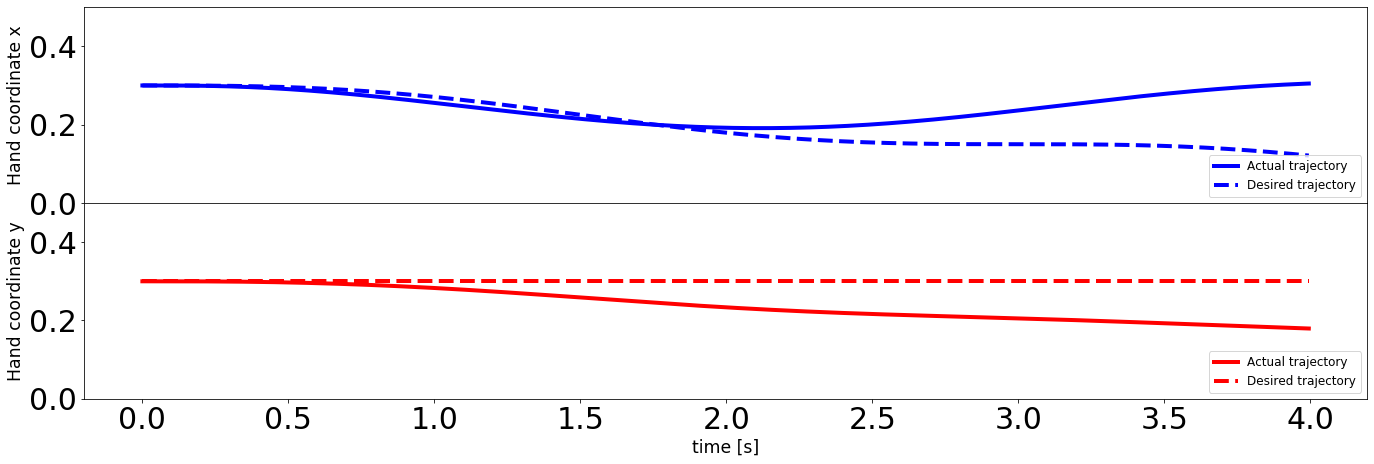

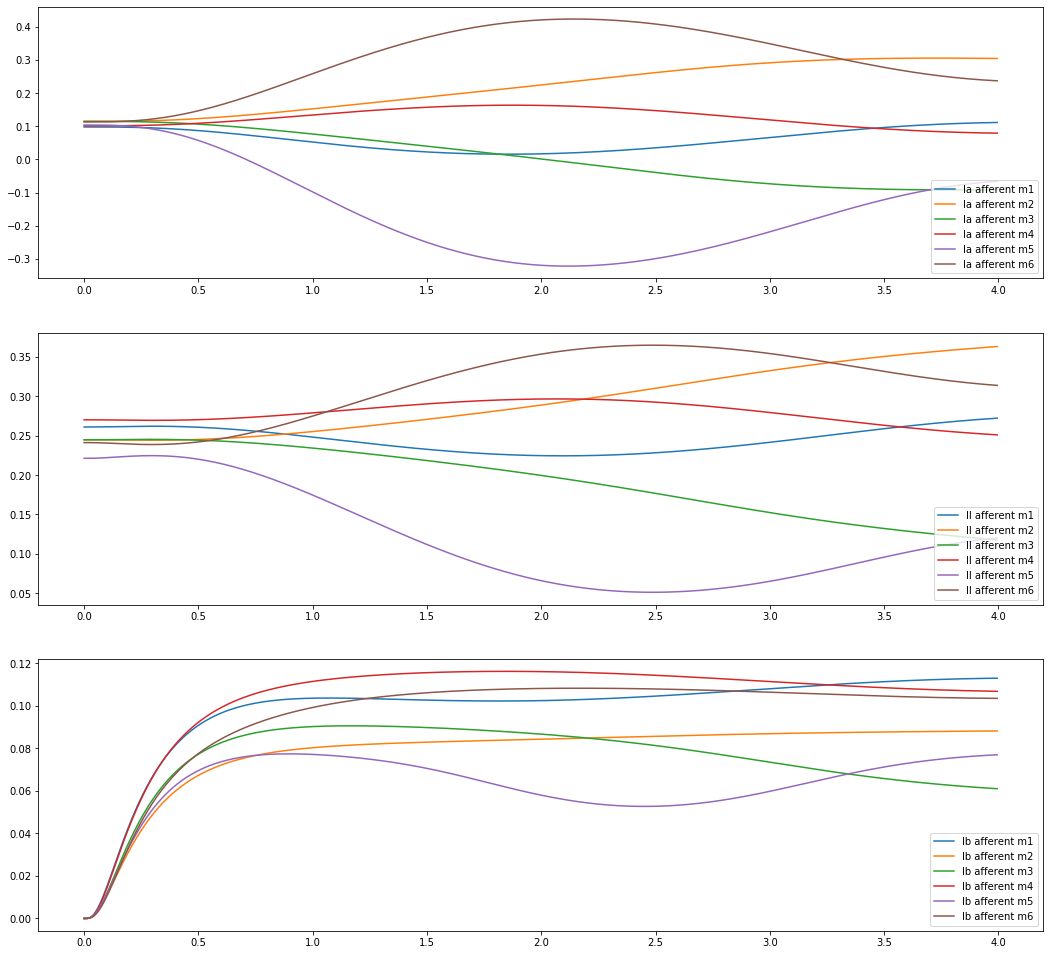

In [5]:
# Creating and runing the simulation

sc = spinal_cord()
start_time = time.time()
sc.initialize()
sc.simulate(4.)
print('Execution time: %s seconds' % (time.time() - start_time))
error = sc.calc_error(0.15,0.3,4.)
print('Error: ' + str(error))

#w = sc.w_list()
#print(w)
#l1 = sc.net.plants[sc.arm].l_arm
#l2 = sc.net.plants[sc.arm].l_farm
#ang_s = sc.arm_activs[:,0]
#print('ang_s: ' + str(ang_s))
#vel_s = sc.arm_activs[:,1]
#print('vel_s: ' + str(vel_s))
#ang_e = sc.arm_activs[:,2]
#print('ang_e: ' + str(ang_e))
#vel_e = sc.arm_activs[:,3]
#print('vel_e: ' + str(vel_e))

#tension_muscle1 = sc.arm_activs[:,4]
#print('tension_muscle1: ' + str(tension_muscle1))
#tension_muscle2 = sc.arm_activs[:,5]
#print('tension_muscle2: ' + str(tension_muscle2))
#tension_muscle3 = sc.arm_activs[:,6]
#print('tension_muscle3: ' + str(tension_muscle3))
#tension_muscle4 = sc.arm_activs[:,7]
#print('tension_muscle4: ' + str(tension_muscle4))
#tension_muscle5 = sc.arm_activs[:,8]
#print('tension_muscle5: ' + str(tension_muscle5))
#tension_muscle6 = sc.arm_activs[:,9]
#print('tension_muscle6: ' + str(tension_muscle6))

#sc.arm_coord(0.15,0.3)
#sc.arm_activity()
#sc.neuron_activity()

sc.arm_trajectory(0.15,0.3,4.)
sc.arm_afferent_output()

In [10]:
#Initial weights

#w = [[2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.06716157864991823, -0.19850560781897328, 0.12500128529942484, 0.03309468813889588, -0.13990160743242114, -0.13913057738025497, 0.010823800794735217, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893], [2.0, 2.0, -0.4469436436793255, 1.8915890404699183, -1.808233961108603, -1.3559271629749419, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865, 0.14476227182019624, -0.05598504586074804], [-2.0, 2.0, -2.0, 2.0, 2.0, 1.8916705547275723, 1.6252145802525275, 0.5318966470726676, 0.19121155784678784, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.18102719529519934, 0.15166716274797148, -0.0008997390737044975], [2.0, -2.0, 2.0, 2.0, -0.6543155782769752, -0.4442518840852867, 0.9744845389701515, 0.15976930476652523, -0.17380172706996203, -0.06032921390085569, -0.006484687749538504, 0.10281104693647869, -0.17728937915275186, -0.1083950926558988, -0.03233264259643054], [2.0, -1.5562255535388942, 1.132263501148206, 0.2696761449625127, -0.7032799290797445, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, -0.10732439344025663], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 1.911141331298305, 0.8253393838184282, -2.0, -1.008336965189399, 1.8750446706415755, 0.7780283911173442, -2.0, -0.1344669629601949, 1.3814449807709774, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222, 0.08296471294546842, 0.03383193769537379, 0.08323853191877528, -0.100744837225469, -0.005173066782243524, -0.11964979602884639, 0.08421724194750918, 0.05223508884485761, 0.18632245001062409, 0.06388028565894938], [2.0, 2.0, 1.2957822835567758, -1.5448621890560528, 1.7322155041832112, -1.6433301113364074, 0.14120993284076794, -0.008431011419863521, 0.17741351429812247, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.1622398916770107], [-2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 1.689506129618911, -0.10112543938806606, 0.8637496404446541, -0.1194712876871194, 0.015057162646764766, -0.03983207161779817, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, -0.0037987958821298073], [2.0, -2.0, 2.0, 2.0, 2.0, 1.6957285161727964, -0.04400502570595943, -1.0802072880589293, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.04057954870249145], [2.0, -1.3684665963161868, 0.8112507817961032, -1.051094245353302, 1.0024285613737622, -1.1166528326705385, -0.01549535186883011, 0.0672506438675281, -0.029502853831418235, -0.18608799107885463, 0.03354591966834111, -0.1386834974775626, -0.10201594754602389, -0.07223266013882143, 0.14310981779390508], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 0.17295757956568547, -1.4626984527478322, -0.07757993049566014, -2.0, -0.6299127464859344, 0.4362550769485978, 0.025167504354009995, 0.09831001106748927, 0.07579441764825967, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, 0.11721635763880461, -0.18140148902956282, -0.013791039036362862, 0.1840194180209142, -0.08483082664400939, 0.1462072114543383, -0.10604317463073967, 0.16720986496267437, -0.19742285956117844, 0.0005263000573994814, 0.1859923560652879, 0.17490195265873015], [2.0, 2.0, 1.0888920733214045, 0.45860810894677106, 1.3513505471747034, 1.7960170699158104, -0.027308049654446387, 0.04912979996411329, 0.08034671569462326, -0.1339018426875852, 0.17150805966560173, 0.0033433982677584795, -0.03226856391850261], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 1.0659575140846358, 1.1889389670608326, 1.627487939456195, 0.1027960834411803, -0.01734294490962221, -0.09508084388186458, 0.14314107416456856, -0.020507358463884906, 0.14432265923915077, -0.1383426332622781, -0.10010116435844259, -0.0841744415475822, -0.14729596148185867], [-2.0, 2.0, 2.0, 2.0, 2.0, 0.7387394628298525, -1.5255375321934372, -1.4077484943606247, -0.10636860063173717, 0.01336229134427952, 0.18690169674238694, 0.06255707641454378, 0.1946783537163505, 0.1506487693752137, 0.001659219989363775, 0.14248040525543126, -0.1727572734521471], [2.0, 1.1995981127148587, -0.5481228394237365, 1.5871892895629074, 1.7086971531721682, -0.995948130344706, 1.1534933018151197, -0.06750768778052971, -0.10937192073963709, -0.06363472818475055, -0.07895202201506338, 0.18874733312642178, -0.19787000027555113, -0.09627009060385722, -0.10260679720789488], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -1.0927584182177, 0.0732489960726474, 0.13623286622469505, 0.056992213834324956, -0.0024841074603887403, -0.015845928566742218, 0.02792523875393743, 0.09486501131200953, -0.009611386985856202, -0.04902458883244548, -0.049878998519035905, -0.15765177537551503, 0.07492261904668795, -0.1814153248120884, -0.1340915478297487, -0.03953006755535582], [2.0, 2.0, -0.23141752983194142, -0.3335270022000403, 1.7466237958571407, 0.8332986839706606, -0.04147788719918655, -0.18118260262106603, -0.17291288649134473, 0.0471692640407427, 0.10286775309733492, -0.005379461314169776, -0.08046234356882379], [-2.0, -2.0, 2.0, 2.0, 2.0, 1.0736233653214482, -0.4316227373640871, -0.5848144585207451, 0.07908858312767558, 0.14894290740077082, 0.15013829796936323, 0.12882000418732537, -0.17341168112146607, -0.02072024240407927, 0.17540464192967364, -0.19597102488152873, 0.049172787967753484], [-2.0, 2.0, 2.0, 2.0, -0.18309063632626188, 1.8241447382919223, -1.4819366614734686, 0.05925915915054686, 0.10371277425156927, 0.18321780119682152, -0.18087425370863797, -0.14735443747920526, 0.17537390712910667, -0.15815018526826347, -0.08971340374189994], [2.0, 0.39398593210990507, 0.8921520793190307, 1.391775012981117, -0.3829139226126661, -0.16140980521915593, 0.04738415529429055, -0.12657642372260153, 0.11564522193397841, -0.134457382703479, -0.1800404062509589], [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.8371200427756724, 0.0471434958222976, 1.7149654801655982, -2.0, 0.959077195591886, -1.5900608592055114, 0.05185509426748264, 0.020453003975285045, 0.1538549600422079, -0.15492401006216217, 0.05793493310093284, 0.013828429715045137, 0.06063385077434502, -0.018084465416920242, -0.15680323160861853, -0.13986588274899192, 0.0984987306067363, -0.0014315863043340982, 0.07641163343263502, 0.08869387880672502, -0.13068629232945006, -0.12459106335215031, -0.07233873903641244, 0.05743581339584436, -0.05919417865744872, 0.005892998126817484], [2.0, 2.0, 0.15203745275739156, 0.08373973574858207, 1.1369191005063355, 0.884772991678382, 0.05902133448936586, 0.027779809962282714, 0.029863325508754313, 0.15253438268942465, -0.14787849040665063, -0.07448251621198759, 0.09638962594040928], [-2.0, 2.0, -2.0, 2.0, -2.0, -2.0, 0.5941355970818529, -1.3814126740529638, 1.7514208076190805, 0.01429846880618632, -0.19448622933998203, 0.10162397775747756, 0.0383367023509133, -0.033006712817969686, 0.11816157437302743, 0.13183067666171794, -0.013810300505924078, -0.07772078096198487, -0.026403491636533438], [2.0, -2.0, 2.0, 2.0, 2.0, -1.368078498324762, -0.4118098497984475, 1.3473236163761904, 0.19046872638051077, -0.10151383586656815, 0.02521046683037334, 0.19832523208980463, 0.0718527707680982, 0.16388029016001587, -0.11788126516410383, -0.1306669294494956, -0.08328023348632484], [2.0, 0.26698208986846783, 0.4897561346948027, -1.8677161183176514, -1.4731475258489364, 1.680118584056915, 0.3068552754938736, 0.1901716623895946, -0.11121831664843329, 0.041293321720263176, 0.08338800099248794, 0.194401342315894, 0.19070102981960618, 0.12198435499847288, -0.08857752939243176], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 0.7907940856230207, 0.8798266669759616, -2.0, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.0, -1.3562164777324401, 1.6377018457966908, -0.0673926597414096, 0.0816990270499734, 0.12595343657455188, 0.18255385999276336, 0.1262660350780555, -0.1922793923235998, -0.11107251179532446, 0.1618831574780205, 0.023189748846410285, -0.02807789813040623, -0.028578885606721588, 0.010512537105597575, -0.09928790490260844, 0.16144944026798047, 0.005063939131333461, 0.17411952102867434, -0.02984020131182913, 0.0331810036426447, 0.1706764565661732, -0.17426421118920868], [2.0, 2.0, 1.8024008172969803, 1.8262496910613417, -1.5347140969461557, 1.0013415215508257, -0.17373010397231312, 0.09510160709857135, 0.10734486483304206, 0.140808424276396, -0.09623091031957065, -0.062128835047673164, 0.07986235687947951], [-2.0, -2.0, 2.0, 2.0, -2.0, -2.0, -1.2198937597112671, 1.9409018704514502, 1.9607209400928842, -0.1029448933394213, 0.07195458054188147, 0.04425608542708451, -0.15853633764538735, 0.03385915839315187, 0.19488514077762548, 0.16625447443663688, -0.14810229768484195, -0.16545272666201055, 0.03572139821834802], [-2.0, 2.0, 2.0, 2.0, 2.0, -0.686299249869736, 1.49725660116591, 1.9406258646931942, -0.07288220223731129, -0.1952109005534342, 0.024898752115020656, 0.13984644566873894, -0.10801866734895237, -0.0996554236450399, 0.14360414129073568, 0.15230458371466105, 0.19387091411302132], [2.0, -0.6338128674265029, -1.1754979409481874, -1.5288241210635007, -0.8653107908764599, 1.807062274537008, -1.7560916348237252, 0.15465645793681237, 0.03932730879082563, 0.07532232888372203, 0.03057853490178139, 0.1847968935382669, -0.04782619873510843, 0.18999077344393583, -0.09106627291137759], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


<IPython.core.display.Javascript object>


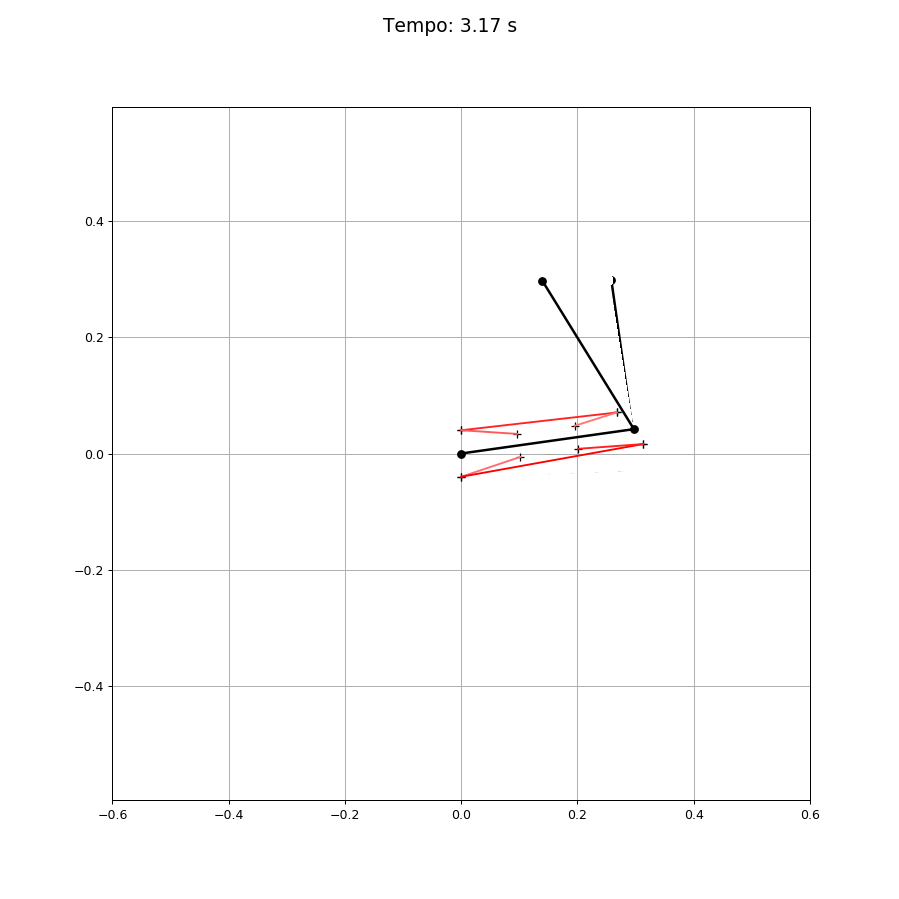

In [8]:
# Animation of the arm and muscles

%matplotlib notebook

# angles of shoulder and elbow
theta_s = sc.arm_activs[:,0]
theta_e = sc.arm_activs[:,2]
phi = theta_s + theta_e # elbow angle wrt x axis
# data from tracking units
acts = np.array(sc.sim_dat[1])
ipx = acts[sc.ipx_track]
ipy = acts[sc.ipy_track]
ten = sc.arm_activs[:,4:10] # muscle tensions
# coordinates of hand and elbow
l1 = sc.net.plants[sc.arm].l_arm
l2 = sc.net.plants[sc.arm].l_farm
xe = cos(theta_s)*l1
ye = sin(theta_s)*l1
xh = xe + cos(phi)*l2
yh = ye + sin(phi)*l2

# Set up formatting for the movie files
#Writer = animation.writers['ffmpeg']
#writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# creating the figure and axis
fig = plt.figure(figsize=(10,10))
plt.axis('equal')
ax = plt.gca()
lim = l1 + l2
ax.set_xlim([-lim, lim])
ax.set_ylim([-lim, lim])
ax.grid()
# creating lines and points
line, = ax.plot([], [], 'o-k', lw=2)
points, = ax.plot([], [], '+k')
# preparing a colormap for the tensions
ten_max = max(ten.max(), 1e-5)
ten_min = min(ten.min(), -1e-5)
for row_idx, row in enumerate(ten):
    for ent_idx, entry in enumerate(row):
        if entry > 0:
            ten[row_idx, ent_idx] = entry/ten_max
        else:
            ten[row_idx, ent_idx] = entry/abs(ten_min)
ten = (ten / 2.) + 0.5
mus_lines = []
#cmap=plt.get_cmap('Reds')
#cmap=plt.get_cmap('coolwarm')
cmap=plt.get_cmap('bwr')
for i in range(6):
    mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])

def init():
    line.set_data([], [])
    points.set_data([], [])
    for i in range(6):
        mus_lines = []
        mus_lines.append(ax.plot([], [], color=cmap(0.5))[0])
    return line, points, mus_lines

def update(frame):
    coord_x = [0, xe[frame], xh[frame]]
    coord_y = [0, ye[frame], yh[frame]]
    ip_x = ipx[:,frame]
    ip_y = ipy[:,frame]
    tens = ten[frame,:]
    line.set_data(coord_x, coord_y)
    points.set_data(ip_x, ip_y)
    for i, ml in enumerate(mus_lines):
        idx = 2*i
        ml.set_data(ip_x[idx:idx+2], ip_y[idx:idx+2])
        ml.set_color(cmap(tens[i]))

    cur_time = frame*0.005
    fig.suptitle('Tempo: ' + '{:.2f}'.format(cur_time) + ' s', fontsize=15)
    return line, points, mus_lines #muscle1

ani = animation.FuncAnimation(fig, update, frames=np.arange(0, len(theta_s), 2), init_func=init, blit=True, 
                              interval=10)
plt.show()
#ani.save('alvo_03_015.mp4', writer=writer)
#ani.save('alvo_03_015.gif', writer='imagemagick', fps=60)


Initial state. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388944, -0.04469436436793256, 0.11322635011482063, 0.18915890404699182, -0.0067161578649918285, -0.06543155782769752, 0.026967614496251263, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:0, e1:8.374481, e2:8.286798, e3:8.480809
change. unit 0 test syns: : [2.5, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388944, -0.04469436436793256, 0.11322635011482063, 0.18915890404699182, -0.0067161578649918285, -0.06543155782769752, 0.026967614496251263, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:1, e1:8.286798, e2:8.286808, e3:8.286790
change. unit 0 test syns: : [2.5, -2.5, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.

uid:0, sid:17, e1:7.867755, e2:7.860127, e3:7.958218
change. unit 0 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, 0.6891670554727573, -0.6556225553538895, -0.5446943643679325, 0.6132263501148206, 0.18915890404699182, -0.0067161578649918285, -0.06543155782769752, 0.026967614496251263, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:18, e1:7.860127, e2:7.859499, e3:7.867755
change. unit 0 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, 0.6891670554727573, -0.6556225553538895, -0.5446943643679325, 0.6132263501148206, 0.6891589040469919, -0.0067161578649918285, -0.06543155782769752, 0.026967614496251263, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:19, e1:7.859499, e2:7.859555, e3:7.859494
change. unit 0 test syns: : [2.5, -2

uid:2, sid:10, e1:6.705491, e2:6.715645, e3:6.700871
change. unit 2 test syns: : [-1.5, 2.5, -1.5, 1.5, 1.5, -0.6051094245353302, -0.3704217716443224, -0.3997571438626238, -0.6544862189056053, -0.3618555019229022, -0.5848308266440094]
Initial state. unit 3 test syns: : [2.0, -2.0, 2.0, 2.0, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, 0.1462072114543383]
uid:3, sid:0, e1:6.700871, e2:6.700867, e3:6.700875
change. unit 3 test syns: : [2.5, -2.0, 2.0, 2.0, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, 0.1462072114543383]
uid:3, sid:1, e1:6.700867, e2:6.700867, e3:6.700867
change. unit 3 test syns: : [2.5, -2.5, 2.0, 2.0, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.004400502570595932, 0.1462072114543383]
uid:3, sid:2, e1:6.700867, e2:6.700867, e3:6.700867
change. unit 3 test syns: : [2.5, -2.5, 2.5, 2.0, 0.16957285161727964, -0.11166528326705386, 0.17322155041832116, -0.00440050257059

uid:5, sid:8, e1:6.451669, e2:6.451342, e3:6.452216
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.0, -2.0, 1.911141331298305, 0.8253393838184282, -2.0, -1.008336965189399, 1.8750446706415755, 0.7780283911173442, -2.0, -0.1344669629601949, -0.16433301113364074, -0.10802072880589293, 0.08637496404446543, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, 0.13513505471747034, -0.15255375321934372, 0.11889389670608325, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512]
uid:5, sid:9, e1:6.451342, e2:6.451338, e3:6.451346
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.0, 1.911141331298305, 0.8253393838184282, -2.0, -1.008336965189399, 1.8750446706415755, 0.7780283911173442, -2.0, -0.1344669629601949, -0.16433301113364074, -0.10802072880589293, 0.0863

uid:5, sid:21, e1:6.432097, e2:6.440057, e3:6.431328
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893, -0.41362503595553457, -0.0015495351868829998, 0.10659575140846361, 0.15871892895629075, 0.10888920733214047, 0.17086971531721684, 0.04586081089467711, 0.04362550769485979, 0.07387394628298527, -0.0995948130344706, 0.13513505471747034, -0.15255375321934372, 0.11889389670608325, 0.17960170699158107, -0.14077484943606247, 0.16274879394561953, 0.115349330181512]
uid:5, sid:22, e1:6.431328, e2:6.431015, e3:6.434810
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893, -0.41362503

uid:5, sid:34, e1:6.430916, e2:6.430916, e3:6.430916
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893, -0.41362503595553457, 0.498450464813117, 0.6065957514084637, -0.34128107104370925, -0.39111079266785953, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, -0.42612605371701473, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, -0.14077484943606247, 0.16274879394561953, 0.115349330181512]
uid:5, sid:35, e1:6.430916, e2:6.430916, e3:6.430916
change. unit 5 test syns: : [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893, -0.41362503595553457

uid:8, sid:4, e1:6.020355, e2:6.020355, e3:6.020355
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 0.17466237958571407, 0.18241447382919224, -0.04316227373640871, 0.08332986839706608, -0.14819366614734686, 0.0005263000573994814]
uid:8, sid:5, e1:6.020355, e2:6.020360, e3:6.020356
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 0.17466237958571407, 0.18241447382919224, -0.04316227373640871, 0.08332986839706608, -0.14819366614734686, 0.0005263000573994814]
uid:8, sid:6, e1:6.020355, e2:6.020385, e3:6.020352
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 0.17466237958571407, -0.31758552617080776, -0.04316227373640871, 0.08332986839706608, -0.14819366614734686, 0.0005263000573994814]
uid:8, sid:7, e1:6.020352, e2:6.020358, e3:6.020353
change. unit 8 test syns: : [2.5, -2.5, 2.5, 2.5, 2.5, 0.17466237958571407, -0.31758552617080776, -0.043162273736408685, 0.08332986839706608, -0.14819366614734686, 0.0005263000573994814]
uid:8, sid:8, e1:6.020352, e2:6.020358, e3:6.0203

uid:10, sid:7, e1:2.436906, e2:2.753567, e3:2.099288
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 2.0, 2.0, -2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 0.17295757956568547, -1.4626984527478322, -0.07757993049566014, -2.0, -0.6299127464859344, -0.18677161183176516, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:8, e1:2.099288, e2:2.311465, e3:1.903414
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 2.0, -2.0, 0.6061818755341326, -0.41276955390223913, -2.0, 0.17295757956568547, -1.4626984527478322, -0.07757993049566014, -2.0, -0.6299127464859344, -0.18677161183176516, 0.015203745

uid:10, sid:19, e1:1.544773, e2:1.544080, e3:1.544840
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, -0.41276955390223913, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.015203745275739144, -0.14731475258489365, 0.008373973574858196, -0.15900608592055115, -0.1368078498324762, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.0884772991678382, 0.13473236163761904, 0.17514208076190807, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:20, e1:1.544080, e2:1.541071, e3:1.544773
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, -0.41276955390223913, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.51520

uid:10, sid:31, e1:1.504152, e2:1.306631, e3:1.530878
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, -0.41276955390223913, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:32, e1:1.306631, e2:1.371888, e3:1.504152
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, -0.41276955390223913, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452

uid:12, sid:9, e1:1.194884, e2:1.182934, e3:1.225283
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, -0.3192937725462992, -0.6534714096946156, 0.649725660116591, 0.694090187045145, 0.10013415215508259, 0.19406258646931945, -0.027308049654446387]
uid:12, sid:10, e1:1.182934, e2:1.182979, e3:1.182923
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, -0.3192937725462992, -0.6534714096946156, 0.649725660116591, 0.694090187045145, -0.3998658478449174, 0.19406258646931945, -0.027308049654446387]
uid:12, sid:11, e1:1.182923, e2:1.182934, e3:1.182921
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, -0.3192937725462992, -0.6534714096946156, 0.649725660116591, 0.694090187045145, -0.3998658478449174, -0.30593741353068055, -0.027308049654446387]
uid:12, sid:12, e1:1.182921, e2:1.358204, e3:1.281070
change. unit 12 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, -0.3192937725462992, -0.6534714096946156, 0.649725660116591, 0.694090187045145, -0.3998658478

uid:15, sid:5, e1:1.048118, e2:1.048119, e3:1.048118
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865]
uid:15, sid:6, e1:1.048118, e2:1.014174, e3:1.123322
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.00823792053350672, -0.1631240253647102, 0.004782972871041513, -0.18286755753249107, 0.12251846152391849, -0.10312053403482349, 0.1392844387905734, 0.07823594326208005, -0.05546925411953893, 0.0022805758184336056, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865]
uid:15, sid:7, e1:1.014174, e2:1.005784, e3:1.025951
change. unit 15 test sy

uid:15, sid:23, e1:0.982790, e2:0.982790, e3:0.982791
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5082379205335067, -0.6631240253647102, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, -0.6031205340348235, 0.6392844387905734, 0.57823594326208, 0.44453074588046104, 0.5022805758184337, -0.08233103103444704, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865]
uid:15, sid:24, e1:0.982790, e2:0.982790, e3:0.982790
change. unit 15 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5082379205335067, -0.6631240253647102, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, -0.6031205340348235, 0.6392844387905734, 0.57823594326208, 0.44453074588046104, 0.5022805758184337, -0.582331031034447, 0.06403382797989177, 0.013654140641639195, -0.12207357572607865]
uid:15, sid:25, e1:0.982790, e2:0.982790, e3:0.982790
change. unit 15 test syns: : [-2.5, -2.5, 2.5,

uid:19, sid:1, e1:0.912155, e2:0.932256, e3:0.916990
change. unit 19 test syns: : [1.5, -0.06032921390085566, 0.1027960834411803]
uid:19, sid:2, e1:0.912155, e2:0.981463, e3:0.965835
change. unit 19 test syns: : [1.5, -0.06032921390085569, 0.1027960834411803]
Initial state. unit 20 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 0.8014692157564789, 0.9710032376503226, -2.0, 0.8371200427756724, 0.0471434958222976, 1.7149654801655982, -2.0, 0.959077195591886, -0.006484687749538504, 0.10281104693647869, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:0, e1:0.912155, e2:0.912187, e3:0.912121
change. unit 20 test syns: : [1.5, -2.0, -2.0, 2.0, 

uid:20, sid:11, e1:0.908285, e2:0.909647, e3:0.903763
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.9710032376503226, -2.0, 0.8371200427756724, 0.0471434958222976, 1.7149654801655982, -2.0, 0.959077195591886, -0.006484687749538504, 0.10281104693647869, -0.17728937915275186, -0.1083950926558988, 0.05170812866740765, -0.0844691158719415, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:12, e1:0.903763, e2:0.907283, e3:0.895600
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.4710032376503226, -2.0, 0.8371200427756724, 0.0471434958222976, 1.7149654801655982, -2.0, 0.959077195591886, -0.006484687749538504, 0.10281104693647869,

uid:20, sid:24, e1:0.220946, e2:0.204921, e3:0.225029
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.5, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:25, e1:0.204921, e2:0.218199, e3:0.220946
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.5, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227

uid:20, sid:37, e1:0.204921, e2:0.572418, e3:1.467237
change. unit 20 test syns: : [1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.5, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469278]
Initial state. unit 21 test syns: : [2.0, 2.0, 0.08296471294546842, 0.03383193769537379, -0.01734294490962221]
uid:21, sid:0, e1:0.204921, e2:0.205858, e3:0.203986
change. unit 21 test syns: : [1.5, 2.0, 0.08296471294546842, 0.03383193769537379, -0.01734294490962221]
uid:21, sid:1, e1:0.203986, e2:0.204131, e3:0.203863
ch

uid:24, sid:0, e1:0.181466, e2:0.182174, e3:0.180797
change. unit 24 test syns: : [1.5, 0.26698208986846783, 0.4897561346948027, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.020507358463884906]
uid:24, sid:1, e1:0.180797, e2:0.181364, e3:0.175072
change. unit 24 test syns: : [1.5, -0.23301791013153217, 0.4897561346948027, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.020507358463884906]
uid:24, sid:2, e1:0.175072, e2:0.175348, e3:0.175576
change. unit 24 test syns: : [1.5, -0.23301791013153217, 0.4897561346948027, -0.002016328965280284, 0.18579820820957416, -0.027851256160158933, -0.020507358463884906]
uid:24, sid:3, e1:0.175072, e2:0.186072, e3:0.170650
change. unit 24 test syns: : [1.5, -0.23301791013153217, 0.4897561346948027, -0.5020163289652803, 0.18579820820957416, -0.027851256160158933, -0.020507358463884906]
uid:24, sid:4, e1:0.170650, e2:0.163601, e3:0.175205
change. unit 24 test syns: : [1.5, -0.23301791013153217, 0.48975613469

uid:25, sid:9, e1:0.138891, e2:0.138211, e3:0.139707
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.0, 0.7907940856230207, 0.8798266669759616, -2.0, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.0, -1.3562164777324401, -0.1194712876871194, 0.015057162646764766, -0.03983207161779817, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235]
uid:25, sid:10, e1:0.138211, e2:0.138214, e3:0.138209
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 0.7907940856230207, 0.8798266669759616, -2.0, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.0, -1.3562164777324401, -0.1194712876871194, 0.0150571626467

uid:25, sid:21, e1:0.134810, e2:0.131591, e3:0.141941
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.4601679283822018, -0.10793968093557581, -0.06199979990535898, -0.06579515063337796, -0.0943300862795883, 0.11076388623381933, 0.11736689912092485, 0.1548912476305419, -0.15460361444622409, -0.16422880575419518, -0.16991746606855043, 0.03546805274692438, 0.16278421537102655, -0.0671218383881334, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235]
uid:25, sid:22, e1:0.131591, e2:0.130841, e3:0.134810
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.484942837353235

uid:25, sid:34, e1:0.130760, e2:0.130760, e3:0.130760
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.46016792838220183, 0.3920603190644242, -0.561999799905359, -0.5657951506333779, 0.4056699137204117, 0.6107638862338194, 0.6173668991209249, 0.654891247630542, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, -0.33721578462897345, 0.43287816161186665, 0.08297567258088245, 0.0672506438675281, -0.029502853831418235]
uid:25, sid:35, e1:0.130760, e2:0.130760, e3:0.130760
change. unit 25 test syns: : [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.460167

uid:28, sid:4, e1:0.112280, e2:0.112280, e3:0.112281
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 2.0, 2.5, 0.09565924874416848, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259]
uid:28, sid:5, e1:0.112280, e2:0.112269, e3:0.112280
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 2.0, 2.5, 0.5956592487441685, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259]
uid:28, sid:6, e1:0.112269, e2:0.182938, e3:0.112271
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 2.0, 2.5, 0.5956592487441685, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259]
uid:28, sid:7, e1:0.112269, e2:0.182938, e3:0.112271
change. unit 28 test syns: : [-1.5, 1.5, 1.5, 2.0, 2.5, 0.5956592487441685, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259]
uid:28, sid:8, e1:0.112269, e2:0.182938, e3:0.11227

Iteration: 1
Error: 0.10716807067139981
Execution time: 21285.60280561447 seconds


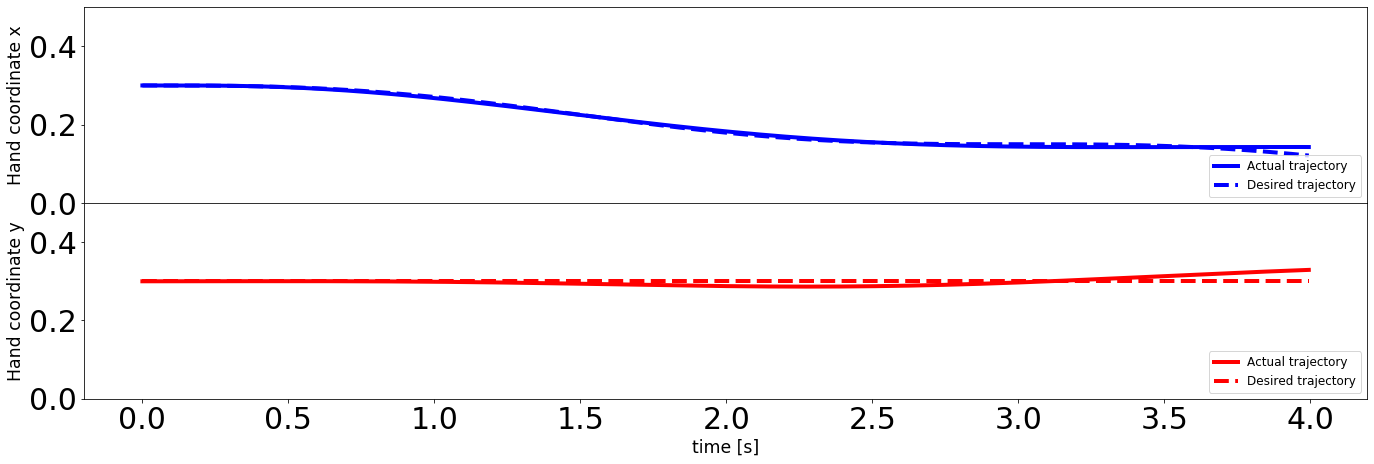

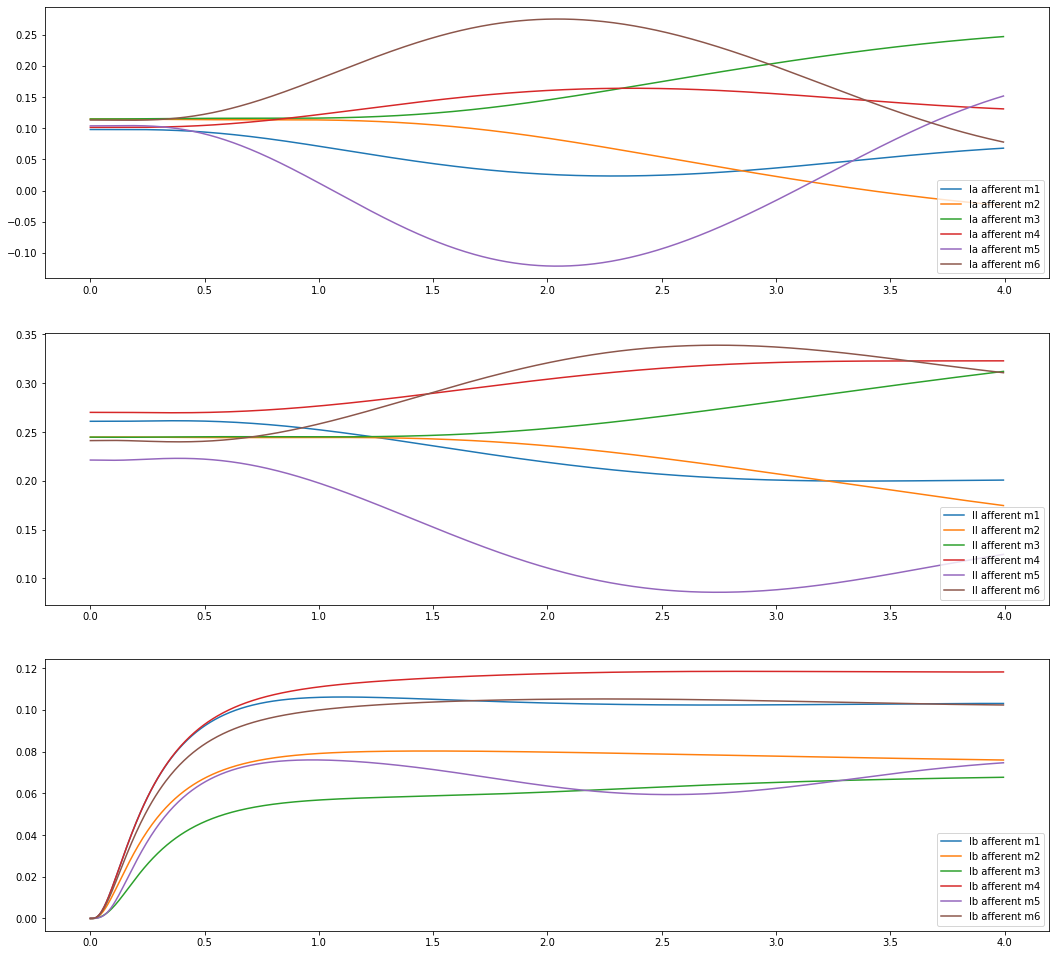

[[2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, 0.6891670554727573, -0.6556225553538895, -0.5446943643679325, 0.6132263501148206, 0.6891589040469919, -0.5067161578649918, -0.5654315578276975, 0.5269676144962513, 0.3191766038891397, 0.45557481159147134, -0.33747854197474725, 0.3644072837025058, 0.5974484538970152, -0.44681033529273323], [2.5, 2.5, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-1.5, 2.5, -1.5, 1.5, 1.5, -0.6051094245353302, -0.3704217716443224, -0.3997571438626238, -0.6544862189056053, -0.3618555019229022, -0.5848308266440094], [2.5, -2.5, 2.5, 2.5, 0.6695728516172796, -0.6116652832670538, 0.6732215504183212, 0.49559949742940407, 0.6462072114543382], [1.5, -0.5101125439388066, -0.6060431746307396], [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893

uid:0, sid:2, e1:0.107168, e2:0.107168, e3:0.107168
change. unit 0 test syns: : [2.0, -2.0, -2.0, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, 0.6891670554727573, -0.6556225553538895, -0.5446943643679325, 0.6132263501148206, 0.6891589040469919, -0.5067161578649918, -0.5654315578276975, 0.5269676144962513, 0.3191766038891397, 0.45557481159147134, -0.33747854197474725, 0.3644072837025058, 0.5974484538970152, -0.44681033529273323]
uid:0, sid:3, e1:0.107168, e2:0.107168, e3:0.107168
change. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, 0.6891670554727573, -0.6556225553538895, -0.5446943643679325, 0.6132263501148206, 0.6891589040469919, -0.5067161578649918, -0.5654315578276975, 0.5269676144962513, 0.3191766038891397, 0.45557481159147134, -0.33747854197474725, 0.3644072837025058, 0.5974484538970152, -0.44681033529273323]
uid:0, sid:4, e1:0.107168, e2:0.107168, e3:0.107168
change. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, 

uid:0, sid:21, e1:0.107168, e2:0.107168, e3:0.107168
change. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388947, -0.044694364367932504, 0.11322635011482063, 0.18915890404699187, -0.006716157864991801, -0.0654315578276975, 0.02696761449625129, 0.3191766038891397, 0.45557481159147134, -0.33747854197474725, 0.3644072837025058, 0.5974484538970152, -0.44681033529273323]
uid:0, sid:22, e1:0.107168, e2:0.107168, e3:0.107167
change. unit 0 test syns: : [2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388947, -0.044694364367932504, 0.11322635011482063, 0.18915890404699187, -0.006716157864991801, -0.0654315578276975, 0.02696761449625129, -0.1808233961108603, 0.45557481159147134, -0.33747854197474725, 0.3644072837025058, 0.5974484538970152, -0.44681033529273323]
uid:0, sid:23, e1:0.107167, e2:0.107168, e3:0.107160
change. unit 0 test syns: : [2.0, 

uid:3, sid:6, e1:0.103203, e2:0.103203, e3:0.103203
change. unit 3 test syns: : [2.0, -2.0, 2.0, 2.0, 0.16957285161727964, -0.11166528326705383, 0.1732215504183212, 0.49559949742940407, 0.6462072114543382]
uid:3, sid:7, e1:0.103203, e2:0.103203, e3:0.103017
change. unit 3 test syns: : [2.0, -2.0, 2.0, 2.0, 0.16957285161727964, -0.11166528326705383, 0.1732215504183212, -0.004400502570595932, 0.6462072114543382]
uid:3, sid:8, e1:0.103017, e2:0.103206, e3:0.107329
change. unit 3 test syns: : [2.0, -2.0, 2.0, 2.0, 0.16957285161727964, -0.11166528326705383, 0.1732215504183212, -0.004400502570595932, 0.6462072114543382]
Initial state. unit 4 test syns: : [1.5, -0.5101125439388066, -0.6060431746307396]
uid:4, sid:0, e1:0.103017, e2:0.103164, e3:0.102887
change. unit 4 test syns: : [1.0, -0.5101125439388066, -0.6060431746307396]
uid:4, sid:1, e1:0.102887, e2:0.106082, e3:0.102023
change. unit 4 test syns: : [1.0, -1.0101125439388066, -0.6060431746307396]
uid:4, sid:2, e1:0.102023, e2:0.109195,

uid:5, sid:10, e1:0.099937, e2:0.099937, e3:0.099937
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893, -0.41362503595553457, 0.498450464813117, 0.6065957514084637, -0.34128107104370925, -0.39111079266785953, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, -0.42612605371701473, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:11, e1:0.099937, e2:0.099937, e3:0.099937
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893, -0.41362503595553457

uid:5, sid:23, e1:0.099937, e2:0.099937, e3:0.099937
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.34128107104370925, -0.39111079266785953, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, -0.42612605371701473, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:24, e1:0.099937, e2:0.099937, e3:0.099937
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555

uid:5, sid:36, e1:0.099937, e2:0.099937, e3:0.099937
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.3372512060543804, 0.615349330181512]
uid:5, sid:37, e1:0.099937, e2:0.099937, e3:0.099937
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346

uid:8, sid:10, e1:0.097048, e2:0.138754, e3:0.267992
change. unit 8 test syns: : [2.0, -2.0, 2.0, 2.0, 2.0, -0.32533762041428593, 0.18241447382919224, -0.5431622737364087, 0.08332986839706608, -0.14819366614734686, 0.0005263000573995091]
Initial state. unit 9 test syns: : [1.5, -0.8684665963161868, 0.3112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121]
uid:9, sid:0, e1:0.097048, e2:0.097039, e3:0.097057
change. unit 9 test syns: : [2.0, -0.8684665963161868, 0.3112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121]
uid:9, sid:1, e1:0.097039, e2:0.097029, e3:0.097058
change. unit 9 test syns: : [2.0, -0.36846659631618683, 0.3112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121]
uid:9, sid:2, e1:0.097029, e2:0.097023, e3:0.102242
change. unit 9 test syns: : [2.0, -0.36846659631618683, 0.8112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405

uid:10, sid:9, e1:0.096907, e2:0.124602, e3:0.124340
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.0, -1.5, 1.5, 1.5, 1.0, 1.5, -1.5, 0.10618187553413261, -0.41276955390223913, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:10, e1:0.096907, e2:0.120037, e3:0.112397
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.0, -1.5, 1.5, 1.5, 1.0, 1.5, -1.5, 0.10618187553413261, -0.41276955390223913, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.51520374527

uid:10, sid:22, e1:0.096884, e2:3.068970, e3:1.862176
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.0, -1.5, 1.5, 1.5, 1.0, 1.5, -1.5, 0.10618187553413261, -0.9127695539022391, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:23, e1:0.096884, e2:0.892356, e3:0.374294
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.0, -1.5, 1.5, 1.5, 1.0, 1.5, -1.5, 0.10618187553413261, -0.9127695539022391, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.515203745275

uid:10, sid:35, e1:0.096884, e2:0.892356, e3:0.374294
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.0, -1.5, 1.5, 1.5, 1.0, 1.5, -1.5, 0.10618187553413261, -0.9127695539022391, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:36, e1:0.096884, e2:0.892356, e3:0.374294
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -1.0, -1.5, 1.5, 1.5, 1.0, 1.5, -1.5, 0.10618187553413261, -0.9127695539022391, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.515203745275

uid:13, sid:7, e1:0.095593, e2:0.095593, e3:0.095593
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 1.1960720940092884, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.45087020003588674]
uid:13, sid:8, e1:0.095593, e2:0.095593, e3:0.095593
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 1.1960720940092884, -0.17560916348237254, -0.6985056078189733, -0.3749987147005751, -0.4669053118611041, -0.45087020003588674]
uid:13, sid:9, e1:0.095593, e2:0.095593, e3:0.095593
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 1.1960720940092884, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611042, -0.45087020003588674]
uid:13, sid:10, e1:0.095593, e2:0.095593, e3:0.095593
change. unit 13 test syns: : [-1.0, 1.5, 1.5, 1.5, 1.5, 1.1960720940092884, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.9508702000358867]
Initial state. unit 14 test syns: : [1.5, 0.699598112

uid:15, sid:12, e1:0.095331, e2:0.095331, e3:0.095331
change. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.0, -2.5, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.5, -0.5082379205335067, -0.6631240253647102, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, -0.6031205340348235, 0.6392844387905734, 0.57823594326208, 0.44453074588046104, 0.5022805758184337, -0.582331031034447, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787]
uid:15, sid:13, e1:0.095331, e2:0.095331, e3:0.095331
change. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.0, -2.5, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.5082379205335067, -0.6631240253647102, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, -0.6031205340348235, 0.6392844387905734, 0.57823594326208, 0.44453074588046104, 0.5022805758184337, -0.582331031034447, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787]
uid:15, sid:14, e1:0.095331, e2:0.095331, e3:0.095331
change. unit 15 test syns: : [-2.0, -2.0, 2.0, 2.0, -2.5

uid:17, sid:0, e1:0.094781, e2:0.094780, e3:0.094783
change. unit 17 test syns: : [-2.0, -2.5, 2.5, 2.5, 1.5, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:1, e1:0.094780, e2:0.094780, e3:0.094780
change. unit 17 test syns: : [-2.0, -2.0, 2.5, 2.5, 1.5, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:2, e1:0.094780, e2:0.094620, e3:0.095238
change. unit 17 test syns: : [-2.0, -2.0, 3.0, 2.5, 1.5, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:3, e1:0.094620, e2:0.095370, e3:0.094593
change. unit 17 test syns: : [-2.0, -2.0, 3.0, 2.0, 1.5, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:4, e1:0.094593, e2:0.094515, e3:0.094688

uid:20, sid:4, e1:0.091471, e2:0.102242, e3:0.091413
change. unit 20 test syns: : [2.0, -1.5, -1.0, 1.5, 1.0, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.5, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:5, e1:0.091413, e2:0.090574, e3:0.092331
change. unit 20 test syns: : [2.0, -1.5, -1.0, 1.5, 1.0, -1.0, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.5, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.322710

uid:20, sid:17, e1:0.088232, e2:0.088232, e3:0.088232
change. unit 20 test syns: : [2.0, -1.5, -1.0, 1.5, 1.0, -1.0, -1.0, 1.5, 1.5, 1.0, -1.0, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.0, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:18, e1:0.088232, e2:0.089854, e3:0.091184
change. unit 20 test syns: : [2.0, -1.5, -1.0, 1.5, 1.0, -1.0, -1.0, 1.5, 1.5, 1.0, -1.0, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.0, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227

uid:20, sid:30, e1:0.088232, e2:0.311692, e3:1.482719
change. unit 20 test syns: : [2.0, -1.5, -1.0, 1.5, 1.0, -1.0, -1.0, 1.5, 1.5, 1.0, -1.0, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.0, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.07291885937657483, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:31, e1:0.088232, e2:0.311692, e3:1.482719
change. unit 20 test syns: : [2.0, -1.5, -1.0, 1.5, 1.0, -1.0, -1.0, 1.5, 1.5, 1.0, -1.0, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.0, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.322

uid:22, sid:7, e1:0.088116, e2:0.088114, e3:0.088116
change. unit 22 test syns: : [-2.0, 1.0, -2.0, 2.0, -2.0, -2.0, 0.08323853191877528, -0.10074483722546912, 0.4948269332177565, -0.6196497960288464, 0.5842172419475091, 0.5522350888448576, -0.5950808438818646]
uid:22, sid:8, e1:0.088114, e2:0.088147, e3:0.088106
change. unit 22 test syns: : [-2.0, 1.0, -2.0, 2.0, -2.0, -2.0, 0.08323853191877528, -0.10074483722546901, -0.005173066782243496, -0.6196497960288464, 0.5842172419475091, 0.5522350888448576, -0.5950808438818646]
uid:22, sid:9, e1:0.088106, e2:0.088099, e3:0.088108
change. unit 22 test syns: : [-2.0, 1.0, -2.0, 2.0, -2.0, -2.0, 0.08323853191877528, -0.10074483722546901, -0.005173066782243496, -0.11964979602884629, 0.5842172419475091, 0.5522350888448576, -0.5950808438818646]
uid:22, sid:10, e1:0.088099, e2:0.088106, e3:0.088098
change. unit 22 test syns: : [-2.0, 1.0, -2.0, 2.0, -2.0, -2.0, 0.08323853191877528, -0.10074483722546901, -0.005173066782243496, -0.1196497960288464, 0.

uid:25, sid:3, e1:0.087935, e2:0.087935, e3:0.087935
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.46016792838220183, 0.3920603190644242, -0.561999799905359, -0.5657951506333779, 0.4056699137204117, 0.6107638862338194, 0.6173668991209249, 0.654891247630542, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, -0.33721578462897345, 0.4328781616118666, -0.41702432741911755, -0.4327493561324719, -0.5295028538314183]
uid:25, sid:4, e1:0.087935, e2:0.087935, e3:0.087935
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.460167928

uid:25, sid:16, e1:0.087935, e2:0.087935, e3:0.087935
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.5, 2.0, -2.5, 0.7907940856230207, 0.8798266669759616, -2.5, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.46016792838220183, 0.3920603190644242, -0.561999799905359, -0.5657951506333779, 0.4056699137204117, 0.6107638862338194, 0.6173668991209249, 0.654891247630542, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, -0.33721578462897345, 0.4328781616118666, -0.41702432741911755, -0.4327493561324719, -0.5295028538314183]
uid:25, sid:17, e1:0.087935, e2:0.087935, e3:0.087935
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.5, 2.0, -2.5, 0.7907940856230207, 0.8798266669759616, -2.5, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.46016

uid:25, sid:29, e1:0.087932, e2:0.087932, e3:0.087932
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.5, 2.0, -2.5, 0.7907940856230207, 0.8798266669759616, -2.5, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.11947128768711934, 0.015057162646764766, -0.03983207161779817, -0.10793968093557582, -0.06199979990535898, -0.06579515063337793, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, -0.15460361444622395, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, -0.33721578462897345, 0.4328781616118666, -0.41702432741911755, -0.4327493561324719, -0.5295028538314183]
uid:25, sid:30, e1:0.087932, e2:0.087935, e3:0.087894
change. unit 25 test syns: : [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.5, 2.0, -2.5, 0.7907940856230207, 0.8798266669759616, -2.5, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.11947128768711934, 0.0150571626467

uid:27, sid:4, e1:0.087384, e2:0.087282, e3:0.087529
change. unit 27 test syns: : [-2.0, -2.0, 2.0, 2.0, -1.0, -1.5, 0.3613165025224374, 0.3979840524539761, -0.07223266013882143, 0.025167504354009995, 0.5983100110674893, 0.5757944176482597, -0.1383426332622781]
uid:27, sid:5, e1:0.087282, e2:0.087264, e3:0.087303
change. unit 27 test syns: : [-2.0, -2.0, 2.0, 2.0, -1.0, -1.0, 0.3613165025224374, 0.3979840524539761, -0.07223266013882143, 0.025167504354009995, 0.5983100110674893, 0.5757944176482597, -0.1383426332622781]
uid:27, sid:6, e1:0.087264, e2:0.087205, e3:0.087479
change. unit 27 test syns: : [-2.0, -2.0, 2.0, 2.0, -1.0, -1.0, 0.8613165025224374, 0.3979840524539761, -0.07223266013882143, 0.025167504354009995, 0.5983100110674893, 0.5757944176482597, -0.1383426332622781]
uid:27, sid:7, e1:0.087205, e2:0.087193, e3:0.087264
change. unit 27 test syns: : [-2.0, -2.0, 2.0, 2.0, -1.0, -1.0, 0.8613165025224374, 0.8979840524539762, -0.07223266013882143, 0.025167504354009995, 0.59831001106

Iteration: 2
Error: 0.08684307694037585
Execution time: 42627.51428556442 seconds


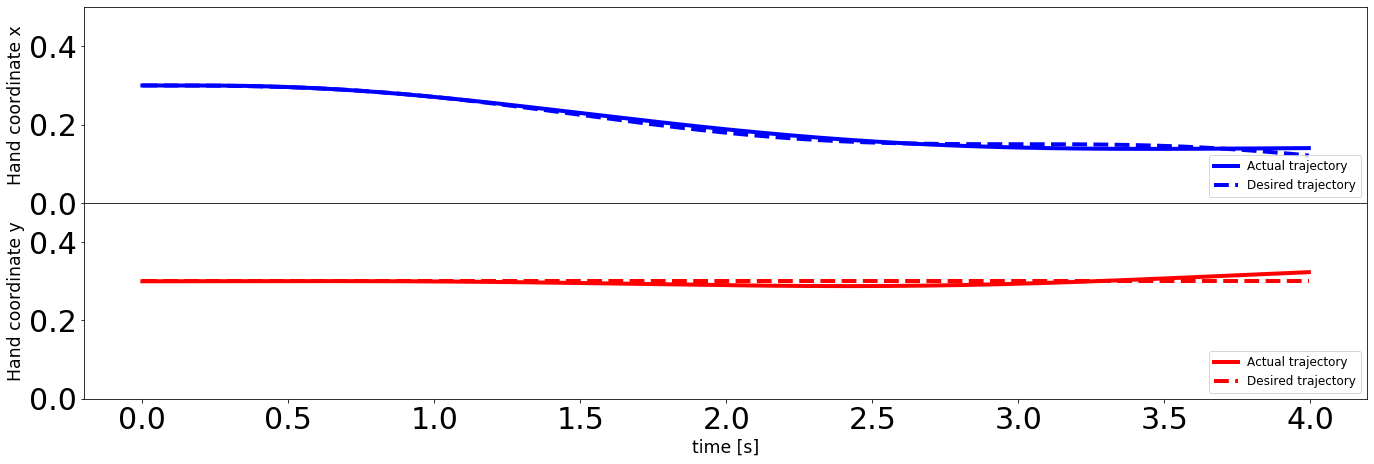

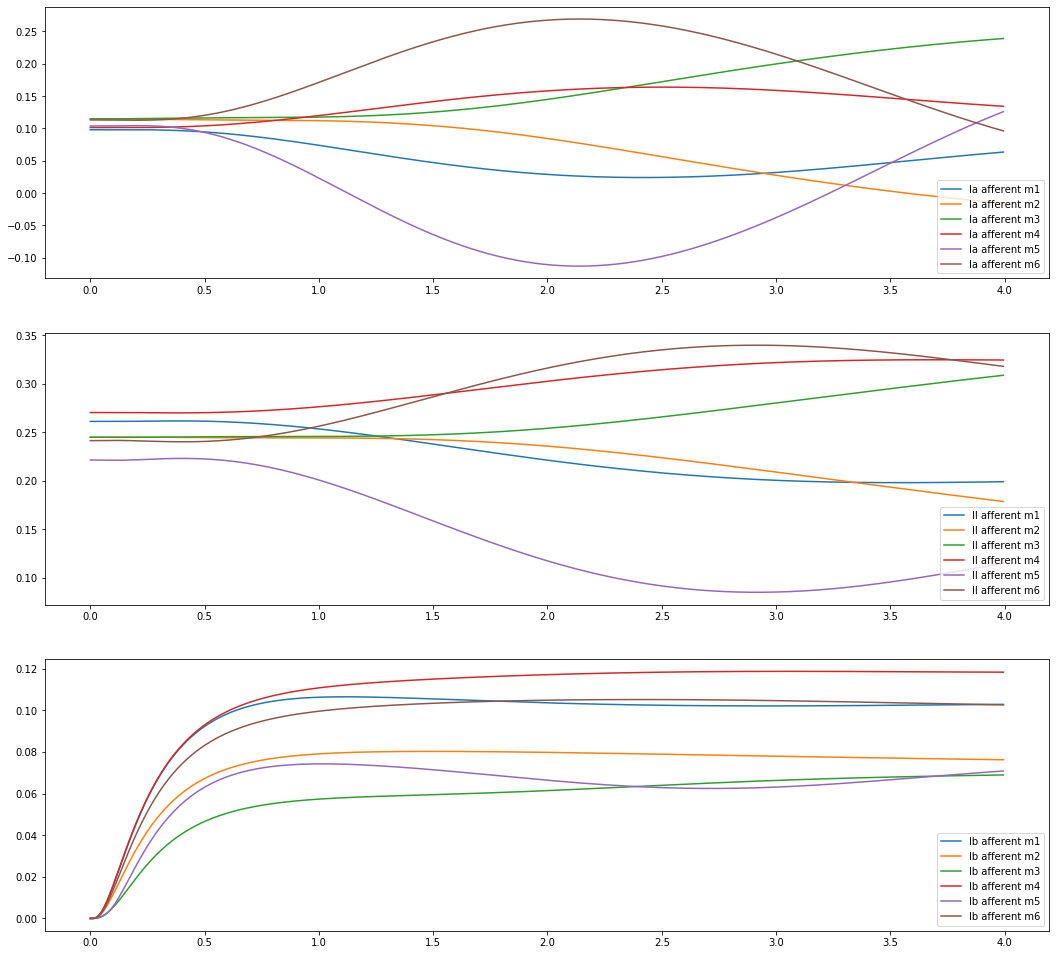

[[2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388947, -0.044694364367932504, 0.11322635011482063, 0.18915890404699187, -0.006716157864991801, -0.0654315578276975, 0.02696761449625129, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677], [2.0, 3.0, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-2.0, 2.0, -2.0, 1.0, 1.0, -0.10510942453533023, -0.8704217716443223, 0.10024285613737621, -1.1544862189056053, -0.8618555019229022, -0.5848308266440094], [2.0, -2.0, 2.0, 2.0, 0.16957285161727964, -0.11166528326705383, 0.1732215504183212, -0.004400502570595932, 0.6462072114543382], [1.0, -1.0101125439388066, -1.1060431746307398], [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1

uid:0, sid:2, e1:0.086836, e2:0.086836, e3:0.086836
change. unit 0 test syns: : [2.2, -2.2, -2.2, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388947, -0.044694364367932504, 0.11322635011482063, 0.18915890404699187, -0.006716157864991801, -0.0654315578276975, 0.02696761449625129, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:3, e1:0.086836, e2:0.086717, e3:0.086971
change. unit 0 test syns: : [2.2, -2.2, -2.2, 2.2, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388947, -0.044694364367932504, 0.11322635011482063, 0.18915890404699187, -0.006716157864991801, -0.0654315578276975, 0.02696761449625129, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:4, e1:0.086717, e2:0.086677, e3:0.086759
change. unit 0 test syns: : [2.2, 

uid:0, sid:20, e1:0.086193, e2:0.086195, e3:0.086192
change. unit 0 test syns: : [2.2, -2.2, -2.2, 2.2, 2.2, -2.2, -2.2, 2.2, 2.2, 2.2, -2.2, 2.2, 2.2, -2.2, 0.38916705547275726, -0.3556225553538895, -0.24469436436793252, 0.31322635011482064, 0.3891589040469919, -0.2067161578649918, -0.2654315578276975, 0.02696761449625129, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:21, e1:0.086192, e2:0.086174, e3:0.086240
change. unit 0 test syns: : [2.2, -2.2, -2.2, 2.2, 2.2, -2.2, -2.2, 2.2, 2.2, 2.2, -2.2, 2.2, 2.2, -2.2, 0.38916705547275726, -0.3556225553538895, -0.24469436436793252, 0.31322635011482064, 0.3891589040469919, -0.2067161578649918, -0.2654315578276975, 0.2269676144962513, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677]
uid:0, sid:22, e1:0.086174, e2:0.086167, e3:0.086192
change. unit 0 test syns: : [2.2, -2.2, -2

uid:3, sid:4, e1:0.085592, e2:0.085652, e3:0.085505
change. unit 3 test syns: : [1.8, -1.8, 1.8, 1.8, -0.03042714838272037, -0.11166528326705383, 0.1732215504183212, -0.004400502570595932, 0.6462072114543382]
uid:3, sid:5, e1:0.085505, e2:0.085501, e3:0.085506
change. unit 3 test syns: : [1.8, -1.8, 1.8, 1.8, -0.03042714838272037, 0.08833471673294618, 0.1732215504183212, -0.004400502570595932, 0.6462072114543382]
uid:3, sid:6, e1:0.085501, e2:0.085588, e3:0.085491
change. unit 3 test syns: : [1.8, -1.8, 1.8, 1.8, -0.03042714838272037, 0.08833471673294618, -0.026778449581678798, -0.004400502570595932, 0.6462072114543382]
uid:3, sid:7, e1:0.085491, e2:0.085501, e3:0.085486
change. unit 3 test syns: : [1.8, -1.8, 1.8, 1.8, -0.03042714838272037, 0.08833471673294618, -0.026778449581678798, -0.20440050257059594, 0.6462072114543382]
uid:3, sid:8, e1:0.085486, e2:0.085626, e3:4.600120
change. unit 3 test syns: : [1.8, -1.8, 1.8, 1.8, -0.03042714838272037, 0.08833471673294618, -0.02677844958167

uid:5, sid:10, e1:0.085136, e2:0.085136, e3:0.085136
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:11, e1:0.085136, e2:0.085136, e3:0.085136
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.913625035955534

uid:5, sid:23, e1:0.085136, e2:0.085136, e3:0.085136
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:24, e1:0.085136, e2:0.085136, e3:0.085136
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.913625035955534

uid:5, sid:36, e1:0.085136, e2:0.085136, e3:0.085136
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:37, e1:0.085136, e2:0.085136, e3:0.085136
change. unit 5 test syns: : [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.913625035955534

uid:8, sid:10, e1:0.084394, e2:0.189478, e3:0.266474
change. unit 8 test syns: : [2.2, -1.8, 2.2, 2.2, 2.2, -0.12533762041428592, 0.18241447382919224, -0.3431622737364087, 0.2833298683970661, 0.05180633385265315, 0.0005263000573994814]
Initial state. unit 9 test syns: : [2.0, -0.36846659631618683, 0.8112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121]
uid:9, sid:0, e1:0.084394, e2:0.084380, e3:0.084407
change. unit 9 test syns: : [2.2, -0.36846659631618683, 0.8112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121]
uid:9, sid:1, e1:0.084380, e2:0.084395, e3:0.084366
change. unit 9 test syns: : [2.2, -0.5684665963161868, 0.8112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121]
uid:9, sid:2, e1:0.084366, e2:0.084338, e3:0.084394
change. unit 9 test syns: : [2.2, -0.5684665963161868, 1.0112507817961032, -0.5584814458520745, 0.4617086077387334, -0.440586

uid:10, sid:9, e1:0.084200, e2:0.089073, e3:0.087868
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.9127695539022391, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:10, e1:0.084200, e2:0.087009, e3:0.086897
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.9127695539022391, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757

uid:10, sid:22, e1:0.084158, e2:0.726994, e3:0.571104
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.3, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:23, e1:0.084158, e2:0.258169, e3:0.168850
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.3, -0.12991274648593443, 0.31322838816823484, 0.515203745275

uid:10, sid:35, e1:0.084158, e2:0.258169, e3:0.168850
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.3, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:36, e1:0.084158, e2:0.258169, e3:0.168850
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.3, -0.12991274648593443, 0.31322838816823484, 0.515203745275

uid:13, sid:7, e1:0.084049, e2:0.084049, e3:0.084049
change. unit 13 test syns: : [-0.8, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.9508702000358867]
uid:13, sid:8, e1:0.084049, e2:0.084049, e3:0.084049
change. unit 13 test syns: : [-0.8, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.9508702000358867]
uid:13, sid:9, e1:0.084049, e2:0.084049, e3:0.084049
change. unit 13 test syns: : [-0.8, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.9508702000358867]
uid:13, sid:10, e1:0.084049, e2:0.084049, e3:0.084049
change. unit 13 test syns: : [-0.8, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -1.1508702000358868]
Initial state. unit 14 test syns: : [2.0, 1.19959811271

uid:15, sid:12, e1:0.084031, e2:0.084031, e3:0.084032
change. unit 15 test syns: : [-1.8, -1.8, 2.2, 2.2, -2.3, -1.8, 1.8, 2.2, 2.2, 2.2, -1.8, 2.2, 2.2, -2.0, -0.008237920533506693, -0.16312402536471016, 0.004782972871041569, -0.18286755753249107, 0.12251846152391849, -0.10312053403482346, 0.1392844387905734, 0.07823594326208005, -0.05546925411953896, 0.002280575818433661, -0.08233103103444706, 0.5640338279798918, 0.5136541406416392, -0.12207357572607869]
uid:15, sid:13, e1:0.084031, e2:0.084031, e3:0.084031
change. unit 15 test syns: : [-1.8, -1.8, 2.2, 2.2, -2.3, -1.8, 1.8, 2.2, 2.2, 2.2, -1.8, 2.2, 2.2, -1.8, -0.008237920533506693, -0.16312402536471016, 0.004782972871041569, -0.18286755753249107, 0.12251846152391849, -0.10312053403482346, 0.1392844387905734, 0.07823594326208005, -0.05546925411953896, 0.002280575818433661, -0.08233103103444706, 0.5640338279798918, 0.5136541406416392, -0.12207357572607869]
uid:15, sid:14, e1:0.084031, e2:0.084016, e3:0.084036
change. unit 15 test syn

uid:17, sid:0, e1:0.082655, e2:0.082657, e3:0.082653
change. unit 17 test syns: : [-2.2, -2.0, 3.0, 2.0, 2.0, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:1, e1:0.082653, e2:0.082653, e3:0.082653
change. unit 17 test syns: : [-2.2, -2.2, 3.0, 2.0, 2.0, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:2, e1:0.082653, e2:0.082518, e3:0.082829
change. unit 17 test syns: : [-2.2, -2.2, 3.2, 2.0, 2.0, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:3, e1:0.082518, e2:0.082512, e3:0.082595
change. unit 17 test syns: : [-2.2, -2.2, 3.2, 2.2, 2.0, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173]
uid:17, sid:4, e1:0.082512, e2:0.082512, e3:0.082515

uid:20, sid:4, e1:0.082191, e2:0.083143, e3:0.082663
change. unit 20 test syns: : [2.0, -1.5, -0.8, 1.5, 1.0, -1.0, -1.0, 1.5, 1.5, 1.0, -1.0, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.0, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:5, e1:0.082191, e2:0.081987, e3:0.082443
change. unit 20 test syns: : [2.0, -1.5, -0.8, 1.5, 1.0, -0.8, -1.0, 1.5, 1.5, 1.0, -1.0, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.0, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.322710

uid:20, sid:17, e1:0.080810, e2:0.080810, e3:0.080810
change. unit 20 test syns: : [2.0, -1.5, -0.8, 1.5, 1.0, -0.8, -0.8, 1.5, 1.5, 1.2, -0.8, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:18, e1:0.080810, e2:0.080800, e3:0.081272
change. unit 20 test syns: : [2.0, -1.5, -0.8, 1.5, 1.0, -0.8, -0.8, 1.5, 1.5, 1.2, -0.8, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.6590771955918859, -0.5064846877495385, 0.6028110469364787, 0.322

uid:20, sid:30, e1:0.080800, e2:0.144933, e3:0.221698
change. unit 20 test syns: : [2.0, -1.5, -0.8, 1.5, 1.0, -0.8, -0.8, 1.5, 1.5, 1.2, -0.8, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.6590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.07291885937657477, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:31, e1:0.080800, e2:0.144933, e3:0.221698
change. unit 20 test syns: : [2.0, -1.5, -0.8, 1.5, 1.0, -0.8, -0.8, 1.5, 1.5, 1.2, -0.8, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.6590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3

uid:22, sid:7, e1:0.080786, e2:0.080795, e3:0.080781
change. unit 22 test syns: : [-1.8, 0.8, -1.8, 1.8, -1.8, -1.8, 0.2832385319187753, -0.300744837225469, -0.005173066782243496, -0.1196497960288464, 0.08421724194750912, 0.05223508884485761, -0.5950808438818646]
uid:22, sid:8, e1:0.080781, e2:0.080781, e3:0.080782
change. unit 22 test syns: : [-1.8, 0.8, -1.8, 1.8, -1.8, -1.8, 0.2832385319187753, -0.300744837225469, 0.19482693321775651, -0.1196497960288464, 0.08421724194750912, 0.05223508884485761, -0.5950808438818646]
uid:22, sid:9, e1:0.080781, e2:0.080786, e3:0.080779
change. unit 22 test syns: : [-1.8, 0.8, -1.8, 1.8, -1.8, -1.8, 0.2832385319187753, -0.300744837225469, 0.19482693321775651, -0.3196497960288464, 0.08421724194750912, 0.05223508884485761, -0.5950808438818646]
uid:22, sid:10, e1:0.080779, e2:0.080778, e3:0.080779
change. unit 22 test syns: : [-1.8, 0.8, -1.8, 1.8, -1.8, -1.8, 0.2832385319187753, -0.300744837225469, 0.19482693321775651, -0.3196497960288464, 0.2842172419

uid:25, sid:3, e1:0.080603, e2:0.080605, e3:0.080602
change. unit 25 test syns: : [-2.3, -2.3, 1.8, 1.8, -2.5, -2.5, 2.0, 2.0, 2.5, 2.0, -2.5, 0.7907940856230207, 0.8798266669759616, -2.5, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.11947128768711934, 0.015057162646764766, -0.03983207161779817, -0.10793968093557582, -0.06199979990535898, -0.06579515063337793, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.16278421537102655, 0.4328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263]
uid:25, sid:4, e1:0.080602, e2:0.080602, e3:0.080602
change. unit 25 test syns: : [-2.3, -2.3, 1.8, 1.8, -2.7, -2.5, 2.0, 2.0, 2.5, 2.0, -2.5, 0.7907940856230207, 0.8798266669759616, -2.5, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.11947128768711934, 0.0150571626467

uid:25, sid:15, e1:0.080446, e2:0.080451, e3:0.080443
change. unit 25 test syns: : [-2.3, -2.3, 1.8, 1.8, -2.7, -2.3, 1.8, 1.8, 2.3, 1.8, -2.3, 0.7907940856230207, 0.8798266669759616, -2.7, -0.7690222787007162, 0.6861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.11947128768711934, 0.015057162646764766, -0.03983207161779817, -0.10793968093557582, -0.06199979990535898, -0.06579515063337793, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.16278421537102655, 0.4328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263]
uid:25, sid:16, e1:0.080443, e2:0.080443, e3:0.080443
change. unit 25 test syns: : [-2.3, -2.3, 1.8, 1.8, -2.7, -2.3, 1.8, 1.8, 2.3, 1.8, -2.3, 0.7907940856230207, 0.8798266669759616, -2.7, -0.7690222787007162, 0.6861789062132357, -0.6185440755241489, -2.5, -1.8562164777324401, -0.11947128768711934, 0.01505716264

uid:25, sid:27, e1:0.080188, e2:0.080462, e3:0.080395
change. unit 25 test syns: : [-2.3, -2.3, 1.8, 1.8, -2.7, -2.3, 1.8, 1.8, 2.3, 1.8, -2.3, 0.7907940856230207, 0.8798266669759616, -2.7, -0.7690222787007162, 0.6861789062132357, -0.6185440755241489, -2.3, -1.6562164777324402, 0.08052871231288067, 0.21505716264676478, -0.03983207161779817, -0.10793968093557582, 0.13800020009464103, 0.13420484936662208, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.16278421537102655, 0.4328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263]
uid:25, sid:28, e1:0.080188, e2:0.080462, e3:0.080395
change. unit 25 test syns: : [-2.3, -2.3, 1.8, 1.8, -2.7, -2.3, 1.8, 1.8, 2.3, 1.8, -2.3, 0.7907940856230207, 0.8798266669759616, -2.7, -0.7690222787007162, 0.6861789062132357, -0.6185440755241489, -2.3, -1.6562164777324402, 0.08052871231288067, 0.2150571626467647

uid:26, sid:4, e1:0.079655, e2:0.081488, e3:0.080268
change. unit 26 test syns: : [2.2, 2.2, 0.013912008921145358, 0.033545919668341084, -0.3556773407608493]
Initial state. unit 27 test syns: : [-2.0, -2.0, 2.0, 2.0, -1.0, -1.0, 0.8613165025224374, 0.8979840524539762, -0.07223266013882143, 0.025167504354009995, 1.0983100110674893, 1.0757944176482597, -0.1383426332622781]
uid:27, sid:0, e1:0.079655, e2:0.079655, e3:0.079655
change. unit 27 test syns: : [-1.8, -2.0, 2.0, 2.0, -1.0, -1.0, 0.8613165025224374, 0.8979840524539762, -0.07223266013882143, 0.025167504354009995, 1.0983100110674893, 1.0757944176482597, -0.1383426332622781]
uid:27, sid:1, e1:0.079655, e2:0.079655, e3:0.079655
change. unit 27 test syns: : [-1.8, -1.8, 2.0, 2.0, -1.0, -1.0, 0.8613165025224374, 0.8979840524539762, -0.07223266013882143, 0.025167504354009995, 1.0983100110674893, 1.0757944176482597, -0.1383426332622781]
uid:27, sid:2, e1:0.079655, e2:0.079682, e3:0.079632
change. unit 27 test syns: : [-1.8, -1.8, 1.8, 2.

Iteration: 3
Error: 0.07921103375790488
Execution time: 63919.31126689911 seconds


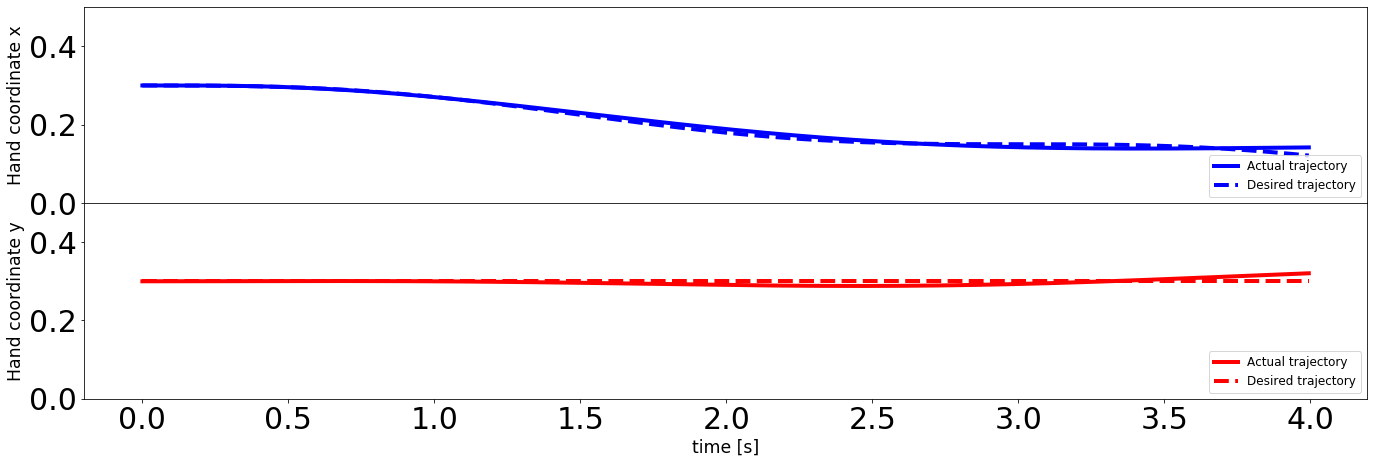

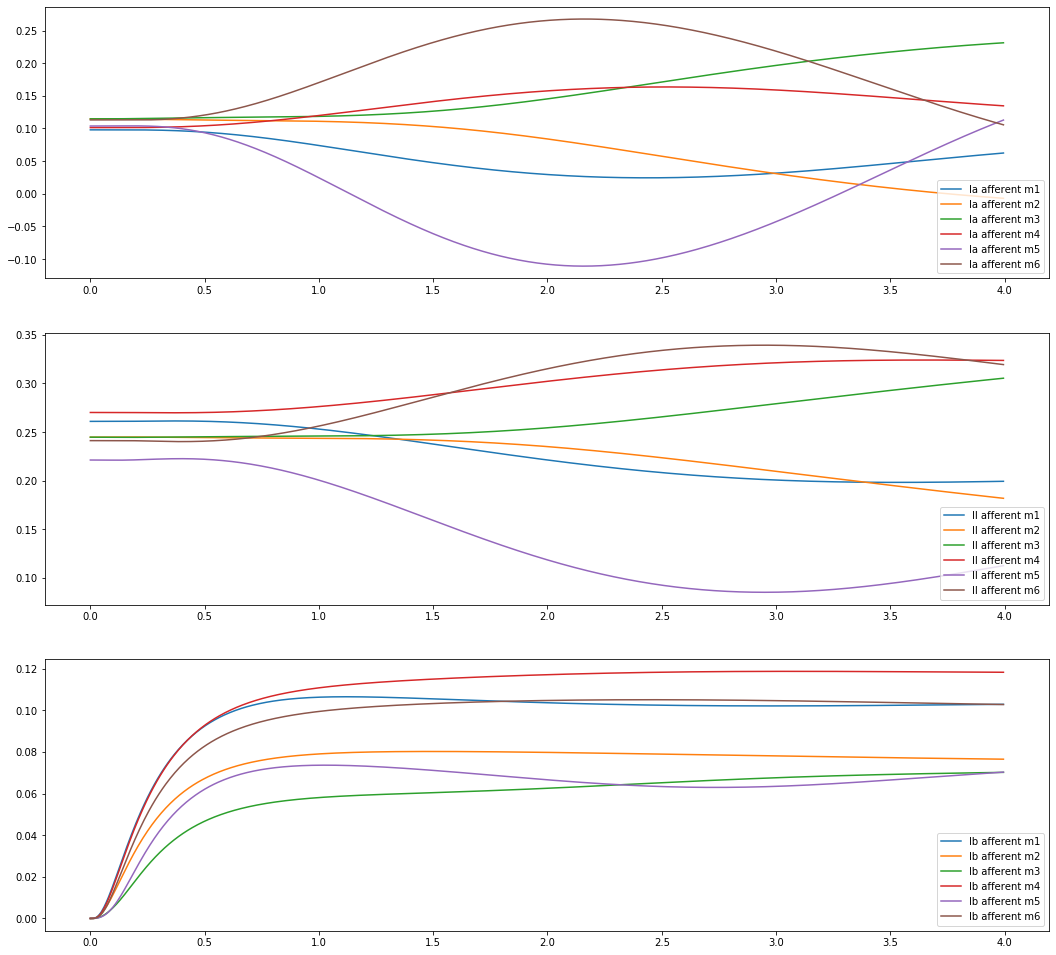

[[2.2, -2.2, -2.2, 2.2, 2.2, -2.2, -2.2, 2.2, 2.2, 2.2, -2.2, 2.2, 2.2, -2.2, 0.38916705547275726, -0.3556225553538895, -0.24469436436793252, 0.31322635011482064, 0.3891589040469919, -0.2067161578649918, -0.2654315578276975, 0.2269676144962513, 0.01917660388913972, 0.15557481159147135, -0.03747854197474726, 0.06440728370250581, 0.2974484538970152, -0.14681033529273324], [1.8, 3.0, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-2.2, 1.8, -2.2, 1.2, 1.2, 0.09489057546466978, -0.6704217716443224, 0.3002428561373762, -0.9544862189056054, -0.6618555019229022, -0.3848308266440094], [1.8, -1.8, 1.8, 1.8, -0.03042714838272037, 0.08833471673294618, -0.026778449581678798, -0.20440050257059594, 0.6462072114543382], [0.8, -1.2101125439388065, -1.3060431746307397], [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.10802

uid:0, sid:2, e1:0.079211, e2:0.079211, e3:0.079211
change. unit 0 test syns: : [2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.2, 2.2, -2.2, -2.2, 2.2, 2.2, 2.2, -2.2, 2.2, 2.2, -2.2, 0.38916705547275726, -0.3556225553538895, -0.24469436436793252, 0.31322635011482064, 0.3891589040469919, -0.2067161578649918, -0.2654315578276975, 0.2269676144962513, 0.01917660388913972, 0.15557481159147135, -0.03747854197474726, 0.06440728370250581, 0.2974484538970152, -0.14681033529273324]
uid:0, sid:3, e1:0.079211, e2:0.079211, e3:0.079211
change. unit 0 test syns: : [2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.2, -2.2, -2.2, 2.2, 2.2, 2.2, -2.2, 2.2, 2.2, -2.2, 0.38916705547275726, -0.3556225553538895, -0.24469436436793252, 0.31322635011482064, 0.3891589040469919, -0.2067161578649918, -0.2654315578276975, 0.2269676144962513, 0.01917660388913972, 0.15557481159147135, -0.03747854197474726, 0.06440728370250581, 0.2974484538970152, -0.146810335292

uid:0, sid:16, e1:0.079211, e2:0.079211, e3:0.079211
change. unit 0 test syns: : [2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, 0.5891670554727573, -0.5556225553538895, -0.4446943643679325, 0.31322635011482064, 0.3891589040469919, -0.2067161578649918, -0.2654315578276975, 0.2269676144962513, 0.01917660388913972, 0.15557481159147135, -0.03747854197474726, 0.06440728370250581, 0.2974484538970152, -0.14681033529273324]
uid:0, sid:17, e1:0.079211, e2:0.079211, e3:0.079211
change. unit 0 test syns: : [2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.40000000000

uid:1, sid:2, e1:0.079126, e2:0.086471, e3:0.099493
change. unit 1 test syns: : [1.6, 3.2, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143]
uid:1, sid:3, e1:0.079126, e2:0.086471, e3:0.099493
change. unit 1 test syns: : [1.6, 3.2, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143]
uid:1, sid:4, e1:0.079126, e2:0.133584, e3:0.248807
change. unit 1 test syns: : [1.6, 3.2, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143]
Initial state. unit 2 test syns: : [-2.2, 1.8, -2.2, 1.2, 1.2, 0.09489057546466978, -0.6704217716443224, 0.3002428561373762, -0.9544862189056054, -0.6618555019229022, -0.3848308266440094]
uid:2, sid:0, e1:0.079126, e2:0.079126, e3:0.079126
change. unit 2 test syns: : [-2.0, 1.8, -2.2, 1.2, 1.2, 0.09489057546466978, -0.6704217716443224, 0.3002428561373762, -0.9544862189056054, -0.6618555019229022, -0.3848308266440094]
uid:2, sid:1, e1:0.079126, e2:0.079126, e3:0.079126
change. unit 2 test syns: : [-2.0, 1.6, -2.2, 1.2, 1.2, 0.0948905754646697

uid:5, sid:3, e1:0.078693, e2:0.078693, e3:0.078693
change. unit 5 test syns: : [2.2, -3.0, -3.2, 3.4000000000000004, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:4, e1:0.078693, e2:0.078693, e3:0.078693
change. unit 5 test syns: : [2.2, -3.0, -3.2, 3.4000000000000004, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.1080207

uid:5, sid:16, e1:0.078693, e2:0.078693, e3:0.078693
change. unit 5 test syns: : [2.2, -3.0, -3.2, 3.4000000000000004, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:17, e1:0.078693, e2:0.078693, e3:0.078693
change. unit 5 test syns: : [2.2, -3.0, -3.2, 3.4000000000000004, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.10802

uid:5, sid:28, e1:0.078693, e2:0.078693, e3:0.078693
change. unit 5 test syns: : [2.2, -3.0, -3.2, 3.4000000000000004, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512]
uid:5, sid:29, e1:0.078693, e2:0.078693, e3:0.078693
change. unit 5 test syns: : [2.2, -3.0, -3.2, 3.4000000000000004, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.10802

uid:7, sid:1, e1:0.078386, e2:0.079068, e3:0.078292
change. unit 7 test syns: : [-3.0, 2.0999999999999996, -3.2, 3.2, -2.2, -3.2, -0.2231417529831941, 0.5892152079319031, -0.23335270022000404, 0.39072415817823003, -0.2183090636326262, -0.06082249870188827, 0.30257714043882156]
uid:7, sid:2, e1:0.078292, e2:0.078293, e3:0.078292
change. unit 7 test syns: : [-3.0, 2.0999999999999996, -3.4000000000000004, 3.2, -2.2, -3.2, -0.2231417529831941, 0.5892152079319031, -0.23335270022000404, 0.39072415817823003, -0.2183090636326262, -0.06082249870188827, 0.30257714043882156]
uid:7, sid:3, e1:0.078292, e2:0.078186, e3:0.078415
change. unit 7 test syns: : [-3.0, 2.0999999999999996, -3.4000000000000004, 3.4000000000000004, -2.2, -3.2, -0.2231417529831941, 0.5892152079319031, -0.23335270022000404, 0.39072415817823003, -0.2183090636326262, -0.06082249870188827, 0.30257714043882156]
uid:7, sid:4, e1:0.078186, e2:0.078186, e3:0.078186
change. unit 7 test syns: : [-3.0, 2.0999999999999996, -3.40000000000

uid:9, sid:4, e1:0.077937, e2:0.078596, e3:0.079142
change. unit 9 test syns: : [2.4000000000000004, -0.7684665963161867, 1.2112507817961031, -0.15848144585207447, 0.4617086077387334, -0.2405864402918147, -0.3140076439347121]
uid:9, sid:5, e1:0.077937, e2:0.078669, e3:0.078064
change. unit 9 test syns: : [2.4000000000000004, -0.7684665963161867, 1.2112507817961031, -0.15848144585207447, 0.4617086077387334, -0.2405864402918147, -0.3140076439347121]
uid:9, sid:6, e1:0.077937, e2:0.102528, e3:0.087567
change. unit 9 test syns: : [2.4000000000000004, -0.7684665963161867, 1.2112507817961031, -0.15848144585207447, 0.4617086077387334, -0.2405864402918147, -0.3140076439347121]
Initial state. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.3, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 

uid:10, sid:10, e1:0.077920, e2:0.080902, e3:0.080550
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.6000000000000001, -1.5, 1.5, 1.5, 0.6000000000000001, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.3, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:11, e1:0.077920, e2:0.078872, e3:0.644808
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.6000000000000001, -1.5, 1.5, 1.5, 0.6000000000000001, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.

uid:10, sid:22, e1:0.077854, e2:0.718588, e3:0.570478
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.6000000000000001, -1.5, 1.5, 1.5, 0.6000000000000001, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.362698452747832, -0.07757993049566014, -1.1, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:23, e1:0.077854, e2:0.252689, e3:0.164358
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.6000000000000001, -1.5, 1.5, 1.5, 0.6000000000000001, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.362698452747832, -0.07757993049566014, -1.1,

uid:10, sid:34, e1:0.077854, e2:0.252689, e3:0.164358
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.6000000000000001, -1.5, 1.5, 1.5, 0.6000000000000001, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.362698452747832, -0.07757993049566014, -1.1, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.15288241210635006, 0.18024008172969802, -0.086531079087646, 0.18262496910613418]
uid:10, sid:35, e1:0.077854, e2:0.252689, e3:0.164358
change. unit 10 test syns: : [-1.5, -1.5, 1.5, 1.5, -0.6000000000000001, -1.5, 1.5, 1.5, 0.6000000000000001, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.362698452747832, -0.07757993049566014, -1.1

uid:13, sid:0, e1:0.077660, e2:0.077660, e3:0.077660
change. unit 13 test syns: : [-0.6000000000000001, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -1.1508702000358868]
uid:13, sid:1, e1:0.077660, e2:0.077660, e3:0.077660
change. unit 13 test syns: : [-0.6000000000000001, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -1.1508702000358868]
uid:13, sid:2, e1:0.077660, e2:0.077660, e3:0.077660
change. unit 13 test syns: : [-0.6000000000000001, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -1.1508702000358868]
uid:13, sid:3, e1:0.077660, e2:0.077660, e3:0.077660
change. unit 13 test syns: : [-0.6000000000000001, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -1.15087020003588

uid:15, sid:8, e1:0.077510, e2:0.077511, e3:0.077509
change. unit 15 test syns: : [-1.6, -1.6, 2.0, 2.0, -2.0999999999999996, -1.6, 1.6, 2.0, 2.0, 2.2, -1.8, 2.2, 2.2, -1.8, 0.19176207946649332, 0.036875974635289854, 0.004782972871041569, -0.18286755753249107, 0.3225184615239185, 0.09687946596517655, 0.1392844387905734, 0.07823594326208005, -0.05546925411953896, 0.002280575818433661, 0.11766896896555296, 0.7640338279798917, 0.7136541406416392, 0.07792642427392132]
uid:15, sid:9, e1:0.077509, e2:0.077511, e3:0.077507
change. unit 15 test syns: : [-1.6, -1.6, 2.0, 2.0, -2.0999999999999996, -1.6, 1.6, 2.0, 2.0, 2.0, -1.8, 2.2, 2.2, -1.8, 0.19176207946649332, 0.036875974635289854, 0.004782972871041569, -0.18286755753249107, 0.3225184615239185, 0.09687946596517655, 0.1392844387905734, 0.07823594326208005, -0.05546925411953896, 0.002280575818433661, 0.11766896896555296, 0.7640338279798917, 0.7136541406416392, 0.07792642427392132]
uid:15, sid:10, e1:0.077507, e2:0.077498, e3:0.077516
change. 

uid:15, sid:26, e1:0.076056, e2:0.076056, e3:0.076056
change. unit 15 test syns: : [-1.6, -1.6, 2.0, 2.0, -2.0999999999999996, -1.6, 1.6, 2.0, 2.0, 2.0, -1.6, 2.0, 2.0, -1.6, 0.39176207946649333, 0.23687597463528987, 0.20478297287104158, 0.017132442467508946, 0.3225184615239185, 0.09687946596517655, 0.3392844387905734, 0.27823594326208007, 0.14453074588046105, 0.20228057581843367, 0.11766896896555296, 0.9640338279798917, 0.9136541406416392, 0.07792642427392132]
uid:15, sid:27, e1:0.076056, e2:0.079408, e3:0.076421
change. unit 15 test syns: : [-1.6, -1.6, 2.0, 2.0, -2.0999999999999996, -1.6, 1.6, 2.0, 2.0, 2.0, -1.6, 2.0, 2.0, -1.6, 0.39176207946649333, 0.23687597463528987, 0.20478297287104158, 0.017132442467508946, 0.3225184615239185, 0.09687946596517655, 0.3392844387905734, 0.27823594326208007, 0.14453074588046105, 0.20228057581843367, 0.11766896896555296, 0.9640338279798917, 0.9136541406416392, 0.07792642427392132]
Initial state. unit 16 test syns: : [1.2, 1.2, -0.6552377281798039, 

uid:20, sid:0, e1:0.075088, e2:0.075437, e3:0.074971
change. unit 20 test syns: : [1.8, -1.5, -0.8, 1.5, 1.0, -0.8, -0.8, 1.5, 1.5, 1.2, -0.8, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.6590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:1, e1:0.074971, e2:0.091550, e3:0.091598
change. unit 20 test syns: : [1.8, -1.5, -0.8, 1.5, 1.0, -0.8, -0.8, 1.5, 1.5, 1.2, -0.8, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.6590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227

uid:20, sid:12, e1:0.074445, e2:0.082513, e3:0.089951
change. unit 20 test syns: : [1.8, -1.5, -0.6000000000000001, 1.5, 1.0, -0.6000000000000001, -0.6000000000000001, 1.5, 1.5, 1.4, -0.6000000000000001, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.6590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:13, e1:0.074445, e2:0.077592, e3:0.077739
change. unit 20 test syns: : [1.8, -1.5, -0.6000000000000001, 1.5, 1.0, -0.6000000000000001, -0.6000000000000001, 1.5, 1.5, 1.4, -0.6000000000000001, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427

uid:20, sid:24, e1:0.073705, e2:0.303258, e3:0.140508
change. unit 20 test syns: : [1.8, -1.5, -0.6000000000000001, 1.5, 1.0, -0.6000000000000001, -0.6000000000000001, 1.5, 1.5, 1.4, -0.6000000000000001, 0.3014692157564789, 0.4710032376503226, -1.5, 0.7371200427756723, -0.05285650417770238, 1.2149654801655982, -0.8, 0.8590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:25, e1:0.073705, e2:0.303258, e3:0.140508
change. unit 20 test syns: : [1.8, -1.5, -0.6000000000000001, 1.5, 1.0, -0.6000000000000001, -0.6000000000000001, 1.5, 1.5, 1.4, -0.6000000000000001, 0.3014692157564789, 0.4710032376503226, -1.5, 0.737120042

uid:20, sid:36, e1:0.073705, e2:0.303258, e3:0.140508
change. unit 20 test syns: : [1.8, -1.5, -0.6000000000000001, 1.5, 1.0, -0.6000000000000001, -0.6000000000000001, 1.5, 1.5, 1.4, -0.6000000000000001, 0.3014692157564789, 0.4710032376503226, -1.5, 0.7371200427756723, -0.05285650417770238, 1.2149654801655982, -0.8, 0.8590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222]
uid:20, sid:37, e1:0.073705, e2:0.125479, e3:0.207419
change. unit 20 test syns: : [1.8, -1.5, -0.6000000000000001, 1.5, 1.0, -0.6000000000000001, -0.6000000000000001, 1.5, 1.5, 1.4, -0.6000000000000001, 0.3014692157564789, 0.4710032376503226, -1.5, 0.737120042

uid:23, sid:7, e1:0.073571, e2:0.076456, e3:2.349291
change. unit 23 test syns: : [0.6000000000000001, -1.6, 1.3, 2.0, 2.0, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.14314107416456856]
uid:23, sid:8, e1:0.073571, e2:0.076456, e3:2.349291
change. unit 23 test syns: : [0.6000000000000001, -1.6, 1.3, 2.0, 2.0, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.14314107416456856]
uid:23, sid:9, e1:0.073571, e2:0.076456, e3:2.349291
change. unit 23 test syns: : [0.6000000000000001, -1.6, 1.3, 2.0, 2.0, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.14314107416456856]
uid:23, sid:10, e1:0.073571, e2:0.418769, e3:2.969204
change. unit 23 test syns: : [0.6000000000000001, -1.6, 1.3, 2.0, 2.0, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.143141

uid:25, sid:7, e1:0.073468, e2:0.073490, e3:0.073447
change. unit 25 test syns: : [-2.0999999999999996, -2.0999999999999996, 1.6, 1.6, -2.9000000000000004, -2.0999999999999996, 1.6, 1.6, 2.3, 1.8, -2.3, 0.7907940856230207, 0.8798266669759616, -2.7, -0.7690222787007162, 0.6861789062132357, -0.6185440755241489, -2.3, -1.6562164777324402, 0.08052871231288067, 0.21505716264676478, -0.03983207161779817, -0.10793968093557582, 0.13800020009464103, 0.13420484936662208, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, 0.04539638555377595, -0.16422880575419518, -0.1699174660685504, 0.2354680527469244, 0.16278421537102655, 0.6328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263]
uid:25, sid:8, e1:0.073447, e2:0.073448, e3:0.073447
change. unit 25 test syns: : [-2.0999999999999996, -2.0999999999999996, 1.6, 1.6, -2.9000000000000004, -2.0999999999999996, 1.6, 1.6, 2.0999999999999996, 1.8, -2.3, 0.7907940856230207, 0.8798266669759616, -2.

uid:25, sid:18, e1:0.073417, e2:0.073418, e3:0.073418
change. unit 25 test syns: : [-2.0999999999999996, -2.0999999999999996, 1.6, 1.6, -2.9000000000000004, -2.0999999999999996, 1.6, 1.6, 2.0999999999999996, 1.6, -2.0999999999999996, 0.7907940856230207, 0.6798266669759616, -2.9000000000000004, -0.5690222787007162, 0.48617890621323573, -0.4185440755241489, -2.3, -1.6562164777324402, 0.08052871231288067, 0.21505716264676478, -0.03983207161779817, -0.10793968093557582, 0.13800020009464103, 0.13420484936662208, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, 0.04539638555377595, -0.16422880575419518, -0.1699174660685504, 0.2354680527469244, 0.16278421537102655, 0.6328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263]
uid:25, sid:19, e1:0.073417, e2:0.073620, e3:0.073692
change. unit 25 test syns: : [-2.0999999999999996, -2.0999999999999996, 1.6, 1.6, -2.9000000000000004, -2.0999999999999996, 1.6, 1.6, 2.0999999999999996, 1.6, -

uid:25, sid:29, e1:0.073417, e2:0.073620, e3:0.073692
change. unit 25 test syns: : [-2.0999999999999996, -2.0999999999999996, 1.6, 1.6, -2.9000000000000004, -2.0999999999999996, 1.6, 1.6, 2.0999999999999996, 1.6, -2.0999999999999996, 0.7907940856230207, 0.6798266669759616, -2.9000000000000004, -0.5690222787007162, 0.48617890621323573, -0.4185440755241489, -2.3, -1.6562164777324402, 0.08052871231288067, 0.21505716264676478, -0.03983207161779817, -0.10793968093557582, 0.13800020009464103, 0.13420484936662208, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, 0.04539638555377595, -0.16422880575419518, -0.1699174660685504, 0.2354680527469244, 0.16278421537102655, 0.6328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263]
uid:25, sid:30, e1:0.073417, e2:0.073581, e3:0.073573
change. unit 25 test syns: : [-2.0999999999999996, -2.0999999999999996, 1.6, 1.6, -2.9000000000000004, -2.0999999999999996, 1.6, 1.6, 2.0999999999999996, 1.6, -

uid:27, sid:0, e1:0.073267, e2:0.073267, e3:0.073267
change. unit 27 test syns: : [-1.6, -1.8, 1.8, 1.8, -0.8, -0.8, 1.0613165025224374, 1.0979840524539761, -0.2722326601388214, -0.17483249564599002, 1.2983100110674892, 1.2757944176482596, -0.3383426332622781]
uid:27, sid:1, e1:0.073267, e2:0.073267, e3:0.073267
change. unit 27 test syns: : [-1.6, -1.6, 1.8, 1.8, -0.8, -0.8, 1.0613165025224374, 1.0979840524539761, -0.2722326601388214, -0.17483249564599002, 1.2983100110674892, 1.2757944176482596, -0.3383426332622781]
uid:27, sid:2, e1:0.073267, e2:0.073267, e3:0.073267
change. unit 27 test syns: : [-1.6, -1.6, 1.6, 1.8, -0.8, -0.8, 1.0613165025224374, 1.0979840524539761, -0.2722326601388214, -0.17483249564599002, 1.2983100110674892, 1.2757944176482596, -0.3383426332622781]
uid:27, sid:3, e1:0.073267, e2:0.073267, e3:0.073266
change. unit 27 test syns: : [-1.6, -1.6, 1.6, 1.6, -0.8, -0.8, 1.0613165025224374, 1.0979840524539761, -0.2722326601388214, -0.17483249564599002, 1.298310011067489

uid:29, sid:6, e1:0.073134, e2:0.088265, e3:0.086977
change. unit 29 test syns: : [3.2, -0.6338128674265029, -1.1754979409481874, 0.11721635763880461, 0.018598510970437243, -0.5137910390363629, -0.08417444154758219]
Initial state. unit 30 test syns: : []
Initial state. unit 31 test syns: : []
Initial state. unit 32 test syns: : []
Initial state. unit 33 test syns: : []
Initial state. unit 34 test syns: : []
Initial state. unit 35 test syns: : []
Initial state. unit 36 test syns: : []
Initial state. unit 37 test syns: : []
Initial state. unit 38 test syns: : []
Initial state. unit 39 test syns: : []
Initial state. unit 40 test syns: : []
Initial state. unit 41 test syns: : []
Initial state. unit 42 test syns: : []
Initial state. unit 43 test syns: : []
Initial state. unit 44 test syns: : []
Initial state. unit 45 test syns: : []
Initial state. unit 46 test syns: : []
Initial state. unit 47 test syns: : []
Initial state. unit 48 test syns: : []
Initial state. unit 49 test syns: : []
Init

Iteration: 4
Error: 0.07313419765117171
Execution time: 85209.60966587067 seconds


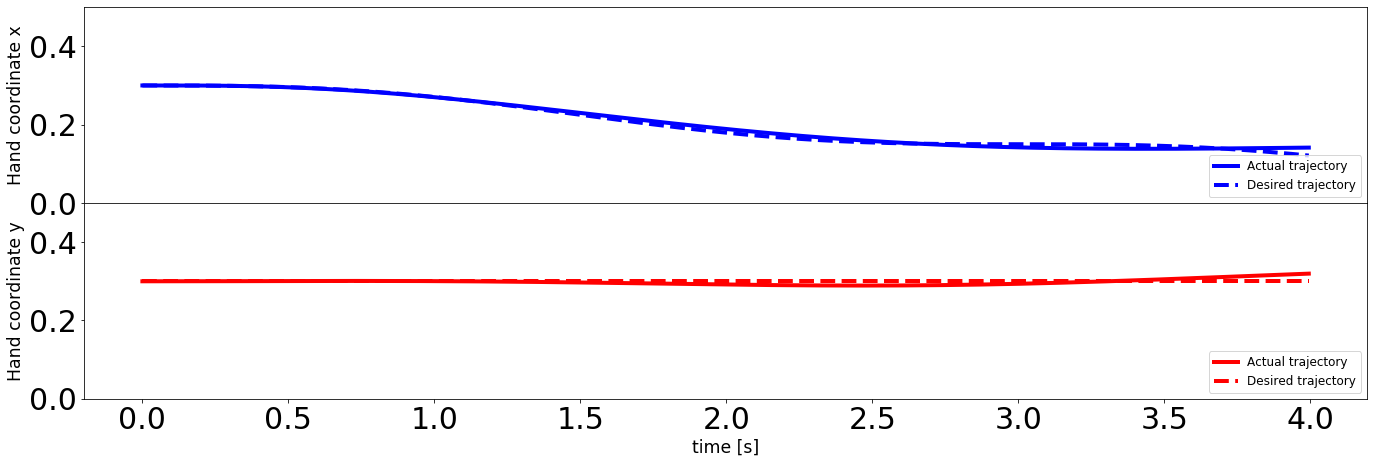

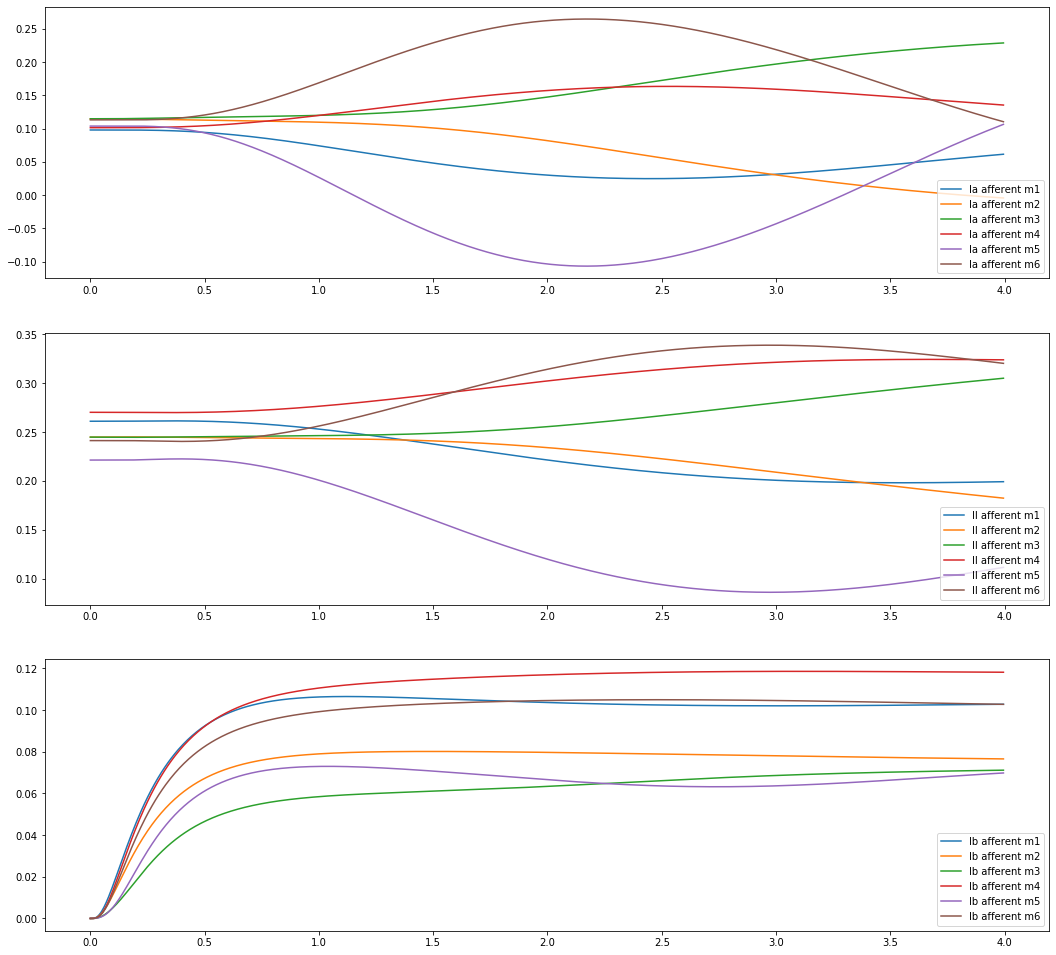

[[2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, 0.5891670554727573, -0.5556225553538895, -0.4446943643679325, 0.5132263501148207, 0.5891589040469919, -0.4067161578649918, -0.4654315578276975, 0.4269676144962513, 0.21917660388913973, 0.35557481159147136, -0.23747854197474727, 0.2644072837025058, 0.4974484538970152, -0.34681033529273325], [1.6, 3.2, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-2.0, 1.6, -2.0, 1.0, 1.0, 0.2948905754646698, -0.8704217716443223, 0.5002428561373762, -1.1544862189056053, -0.8618555019229022, -0.3848308266440094], [1.6, -1.6, 1.6, 1.6, -0.23042714838272038, 0.08833471673294618, -0.026778449581678798, -0.20440050257059594, 0.6462072114543382], [0.6000000000000001, -1.4101125439388065, -1.5060431746307397], [

In [6]:
w = sc.grad_desc()
#print(w)

In [6]:
# Synapse weights for 4 iterations: [0.5, 0.5, 0.2, 0.2]]

# (0.15,0.3)
#Iteration 1
#w = [[2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, 0.6891670554727573, -0.6556225553538895, -0.5446943643679325, 0.6132263501148206, 0.6891589040469919, -0.5067161578649918, -0.5654315578276975, 0.5269676144962513, 0.3191766038891397, 0.45557481159147134, -0.33747854197474725, 0.3644072837025058, 0.5974484538970152, -0.44681033529273323], [2.5, 2.5, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-1.5, 2.5, -1.5, 1.5, 1.5, -0.6051094245353302, -0.3704217716443224, -0.3997571438626238, -0.6544862189056053, -0.3618555019229022, -0.5848308266440094], [2.5, -2.5, 2.5, 2.5, 0.6695728516172796, -0.6116652832670538, 0.6732215504183212, 0.49559949742940407, 0.6462072114543382], [1.5, -0.5101125439388066, -0.6060431746307396], [2.5, -2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, -2.5, 2.411141331298305, 1.3253393838184282, -2.5, -1.508336965189399, 2.3750446706415755, 1.2780283911173442, -2.5, 0.3655330370398051, 0.33566698886635926, -0.608020728805893, -0.41362503595553457, 0.498450464813117, 0.6065957514084637, -0.34128107104370925, -0.39111079266785953, 0.6708697153172168, 0.5458608108946771, 0.5436255076948597, -0.42612605371701473, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512], [2.5, 2.5, 0.6073623365321448, 0.5393985932109905, 0.6672098649626743], [-2.5, 2.5, -2.5, 2.5, -2.5, -2.5, -0.5231417529831941, 0.5892152079319031, -0.533352700220004, 0.39072415817823003, -0.5183090636326262, -0.36082249870188826, 0.30257714043882156], [2.5, -2.5, 2.5, 2.5, 2.5, 0.17466237958571407, -0.31758552617080776, -0.04316227373640871, 0.08332986839706608, -0.14819366614734686, 0.0005263000573994814], [1.5, -0.8684665963161868, 0.3112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121], [-1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, 1.5, -1.5, 0.10618187553413261, -0.41276955390223913, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418], [1.5, 1.5, -0.3362298154203309, -0.5686299249869736, 0.17490195265873015], [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, -0.3192937725462992, -0.6534714096946156, 0.649725660116591, 0.694090187045145, -0.3998658478449174, -0.30593741353068055, -0.027308049654446387], [-1.5, 1.5, 1.5, 1.5, 1.5, 0.6960720940092884, -0.6756091634823725, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.45087020003588674], [1.5, 0.6995981127148587, -0.04812283942373652, -0.6399016074324211, -0.6391305773802549, 0.5108238007947352, -0.41965328430537674], [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 2.5, 2.5, -2.5, -0.5082379205335067, -0.6631240253647102, 0.5047829728710416, 0.31713244246750893, -0.3774815384760815, -0.6031205340348235, 0.6392844387905734, 0.57823594326208, 0.44453074588046104, 0.5022805758184337, -0.582331031034447, 0.5640338279798918, 0.5136541406416392, -0.6220735757260787], [1.5, 1.5, -0.35523772817980376, -0.30878844215321216, -0.6339018426875852], [-2.5, -2.5, 2.5, 2.5, 1.5, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173], [-2.5, 1.5, 1.5, 1.5, -0.31897280470480066, -0.3483328372520285, -0.34023069523347477, -0.673801727069962, -0.4966566017322415], [1.5, -0.06032921390085569, 0.1027960834411803], [1.5, -1.5, -1.5, 1.5, 1.5, -1.5, -1.5, 1.5, 1.5, 1.5, -1.5, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.5, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222], [1.5, 1.5, -0.4170352870545316, -0.4661680623046262, -0.01734294490962221], [-1.5, 1.5, -1.5, 1.5, -1.5, -1.5, 0.5832385319187753, -0.600744837225469, 0.4948269332177565, -0.6196497960288464, 0.5842172419475091, 0.5522350888448576, -0.5950808438818646], [1.5, -1.5, 1.5, 1.5, 1.5, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.14314107416456856], [1.5, -0.23301791013153217, 0.4897561346948027, -0.5020163289652803, 0.6857982082095742, -0.5278512561601589, -0.5205073584638849], [-2.5, -2.5, 2.5, 2.5, -2.5, -2.5, 2.5, 2.5, 2.5, 2.5, -2.5, 1.2907940856230207, 1.3798266669759616, -2.5, -1.469022278700716, 1.3861789062132357, -1.3185440755241489, -2.5, -1.8562164777324401, -0.6194712876871193, -0.48494283735323523, 0.46016792838220183, 0.3920603190644242, -0.561999799905359, -0.5657951506333779, 0.4056699137204117, 0.6107638862338194, 0.6173668991209249, 0.654891247630542, -0.6546036144462241, 0.3357711942458048, 0.3300825339314496, -0.4645319472530756, -0.33721578462897345, 0.4328781616118666, -0.41702432741911755, -0.4327493561324719, -0.5295028538314183], [1.5, 1.5, -0.6860879910788547, -0.4664540803316589, -0.3556773407608492], [-2.5, -2.5, 2.5, 2.5, -1.5, -1.5, 0.3613165025224374, 0.3979840524539761, -0.07223266013882143, 0.025167504354009995, 0.5983100110674893, 0.5757944176482597, -0.1383426332622781], [-1.5, 1.5, 1.5, 2.0, 2.5, 0.5956592487441685, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259], [2.5, -1.133812867426503, -1.6754979409481874, 0.11721635763880461, -0.6814014890295628, -0.5137910390363629, -0.0841744415475822], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 2
#w = [[2.0, -2.0, -2.0, 2.0, 2.0, -2.0, -2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, 0.18916705547275725, -0.15562255535388947, -0.044694364367932504, 0.11322635011482063, 0.18915890404699187, -0.006716157864991801, -0.0654315578276975, 0.02696761449625129, -0.1808233961108603, -0.04442518840852866, 0.16252145802525275, -0.1355927162974942, 0.09744845389701517, 0.05318966470726677], [2.0, 3.0, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-2.0, 2.0, -2.0, 1.0, 1.0, -0.10510942453533023, -0.8704217716443223, 0.10024285613737621, -1.1544862189056053, -0.8618555019229022, -0.5848308266440094], [2.0, -2.0, 2.0, 2.0, 0.16957285161727964, -0.11166528326705383, 0.1732215504183212, -0.004400502570595932, 0.6462072114543382], [1.0, -1.0101125439388066, -1.1060431746307398], [2.0, -3.0, -3.0, 3.0, 2.5, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512], [2.5, 3.0, 0.6073623365321448, 0.5393985932109905, 0.6672098649626743], [-3.0, 2.5, -3.0, 3.0, -2.0, -3.0, -0.023141752983194097, 0.5892152079319031, -0.03335270022000403, 0.39072415817823003, -0.018309063632626188, 0.13917750129811174, 0.30257714043882156], [2.0, -2.0, 2.0, 2.0, 2.0, -0.32533762041428593, 0.18241447382919224, -0.5431622737364087, 0.08332986839706608, -0.14819366614734686, 0.0005263000573994814], [2.0, -0.36846659631618683, 0.8112507817961032, -0.5584814458520745, 0.4617086077387334, -0.4405864402918147, -0.3140076439347121], [-1.5, -1.5, 1.5, 1.5, -1.0, -1.5, 1.5, 1.5, 1.0, 1.5, -1.5, 0.10618187553413261, -0.9127695539022391, -1.5, 0.17295757956568547, -0.9626984527478322, -0.07757993049566014, -1.5, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418], [2.0, 2.0, -0.3362298154203309, -0.5686299249869736, 0.17490195265873015], [-3.0, -3.0, 3.0, 3.0, -3.0, -3.0, -0.8192937725462992, -1.1534714096946157, 1.149725660116591, 1.194090187045145, -0.8998658478449174, -0.8059374135306805, -0.027308049654446387], [-1.0, 1.5, 1.5, 1.5, 1.5, 1.1960720940092884, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -0.9508702000358867], [2.0, 1.1995981127148587, -0.5481228394237365, -0.13990160743242108, -0.13913057738025492, 0.5108238007947352, -0.41965328430537674], [-2.0, -2.0, 2.0, 2.0, -2.5, -2.0, 2.0, 2.0, 2.0, 2.0, -2.0, 2.0, 2.0, -2.0, -0.008237920533506693, -0.16312402536471016, 0.004782972871041569, -0.18286755753249107, 0.12251846152391849, -0.10312053403482346, 0.1392844387905734, 0.07823594326208005, -0.05546925411953896, 0.002280575818433661, -0.08233103103444706, 0.5640338279798918, 0.5136541406416392, -0.12207357572607869], [1.0, 1.0, -0.8552377281798038, -0.8087884421532121, -1.1339018426875853], [-2.0, -2.0, 3.0, 2.0, 2.0, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173], [-2.0, 1.5, 1.5, 1.0, 0.18102719529519934, -0.8483328372520285, -0.34023069523347477, -0.673801727069962, -0.9966566017322416], [2.0, -0.06032921390085569, 0.1027960834411803], [2.0, -1.5, -1.0, 1.5, 1.0, -1.0, -1.0, 1.5, 1.5, 1.0, -1.0, 0.3014692157564789, 0.4710032376503226, -1.5, 0.3371200427756724, -0.4528565041777024, 1.2149654801655982, -1.0, 0.459077195591886, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222], [1.0, 1.0, -0.4170352870545316, -0.4661680623046262, -0.01734294490962221], [-2.0, 1.0, -2.0, 2.0, -2.0, -2.0, 0.08323853191877528, -0.10074483722546901, -0.005173066782243496, -0.1196497960288464, 0.08421724194750912, 0.05223508884485761, -0.5950808438818646], [1.0, -2.0, 1.5, 2.0, 2.0, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.14314107416456856], [1.0, -0.23301791013153217, 0.4897561346948027, -1.0020163289652801, 1.1857982082095742, -1.027851256160159, -0.5205073584638849], [-2.5, -2.5, 2.0, 2.0, -2.5, -2.5, 2.0, 2.0, 2.5, 2.0, -2.5, 0.7907940856230207, 0.8798266669759616, -2.5, -0.9690222787007161, 0.8861789062132357, -0.8185440755241489, -2.5, -1.8562164777324401, -0.11947128768711934, 0.015057162646764766, -0.03983207161779817, -0.10793968093557582, -0.06199979990535898, -0.06579515063337793, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, -0.15460361444622406, -0.16422880575419518, -0.1699174660685504, 0.03546805274692438, 0.16278421537102655, 0.4328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263], [2.0, 2.0, -0.18608799107885465, 0.033545919668341084, -0.3556773407608492], [-2.0, -2.0, 2.0, 2.0, -1.0, -1.0, 0.8613165025224374, 0.8979840524539762, -0.07223266013882143, 0.025167504354009995, 1.0983100110674893, 1.0757944176482597, -0.1383426332622781], [-2.0, 2.0, 2.0, 2.5, 3.0, 0.5956592487441685, 0.1599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259], [3.0, -0.6338128674265029, -1.1754979409481874, 0.11721635763880461, -0.18140148902956277, -0.5137910390363629, -0.0841744415475822], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 3
#w = [[2.2, -2.2, -2.2, 2.2, 2.2, -2.2, -2.2, 2.2, 2.2, 2.2, -2.2, 2.2, 2.2, -2.2, 0.38916705547275726, -0.3556225553538895, -0.24469436436793252, 0.31322635011482064, 0.3891589040469919, -0.2067161578649918, -0.2654315578276975, 0.2269676144962513, 0.01917660388913972, 0.15557481159147135, -0.03747854197474726, 0.06440728370250581, 0.2974484538970152, -0.14681033529273324], [1.8, 3.0, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-2.2, 1.8, -2.2, 1.2, 1.2, 0.09489057546466978, -0.6704217716443224, 0.3002428561373762, -0.9544862189056054, -0.6618555019229022, -0.3848308266440094], [1.8, -1.8, 1.8, 1.8, -0.03042714838272037, 0.08833471673294618, -0.026778449581678798, -0.20440050257059594, 0.6462072114543382], [0.8, -1.2101125439388065, -1.3060431746307397], [2.0, -3.0, -3.0, 3.2, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512], [2.5, 3.2, 0.6073623365321448, 0.5393985932109905, 0.6672098649626743], [-3.2, 2.3, -3.2, 3.2, -2.2, -3.2, -0.2231417529831941, 0.5892152079319031, -0.23335270022000404, 0.39072415817823003, -0.2183090636326262, -0.06082249870188827, 0.30257714043882156], [2.2, -1.8, 2.2, 2.2, 2.2, -0.12533762041428592, 0.18241447382919224, -0.3431622737364087, 0.2833298683970661, 0.05180633385265315, 0.0005263000573994814], [2.2, -0.5684665963161868, 1.0112507817961032, -0.3584814458520745, 0.4617086077387334, -0.2405864402918147, -0.3140076439347121], [-1.5, -1.5, 1.5, 1.5, -0.8, -1.5, 1.5, 1.5, 0.8, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.1626984527478321, -0.07757993049566014, -1.3, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418], [2.2, 2.2, -0.5362298154203309, -0.5686299249869736, 0.17490195265873015], [-3.2, -3.0, 2.8, 2.8, -3.2, -3.2, -1.0192937725462992, -1.3534714096946157, 0.9497256601165911, 0.9940901870451451, -1.0998658478449175, -1.0059374135306804, -0.027308049654446387], [-0.8, 1.5, 1.5, 1.5, 1.5, 1.3960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -1.1508702000358868], [2.2, 0.9995981127148588, -0.3481228394237365, -0.13990160743242108, -0.13913057738025492, 0.5108238007947352, -0.41965328430537674], [-1.8, -1.8, 2.2, 2.2, -2.3, -1.8, 1.8, 2.2, 2.2, 2.2, -1.8, 2.2, 2.2, -1.8, 0.19176207946649332, 0.036875974635289854, 0.004782972871041569, -0.18286755753249107, 0.3225184615239185, 0.09687946596517655, 0.1392844387905734, 0.07823594326208005, -0.05546925411953896, 0.002280575818433661, 0.11766896896555296, 0.7640338279798917, 0.7136541406416392, 0.07792642427392132], [1.2, 1.2, -0.6552377281798039, -0.6087884421532122, -0.9339018426875854], [-2.2, -2.2, 3.2, 2.2, 2.2, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173], [-1.8, 1.5, 1.5, 1.0, 0.38102719529519935, -0.8483328372520285, -0.34023069523347477, -0.673801727069962, -1.1966566017322415], [2.0, -0.06032921390085569, 0.1027960834411803], [2.0, -1.5, -0.8, 1.5, 1.0, -0.8, -0.8, 1.5, 1.5, 1.2, -0.8, 0.3014692157564789, 0.4710032376503226, -1.5, 0.5371200427756724, -0.2528565041777024, 1.2149654801655982, -0.8, 0.6590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222], [1.2, 0.8, -0.6170352870545316, -0.6661680623046262, -0.01734294490962221], [-1.8, 0.8, -1.8, 1.8, -1.8, -1.8, 0.2832385319187753, -0.300744837225469, 0.19482693321775651, -0.3196497960288464, 0.28421724194750914, 0.2522350888448576, -0.5950808438818646], [0.8, -1.8, 1.3, 2.2, 2.2, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.14314107416456856], [0.8, -0.03301791013153216, 0.2897561346948027, -1.20201632896528, 1.1857982082095742, -1.2278512561601589, -0.5205073584638849], [-2.3, -2.3, 1.8, 1.8, -2.7, -2.3, 1.8, 1.8, 2.3, 1.8, -2.3, 0.7907940856230207, 0.8798266669759616, -2.7, -0.7690222787007162, 0.6861789062132357, -0.6185440755241489, -2.3, -1.6562164777324402, 0.08052871231288067, 0.21505716264676478, -0.03983207161779817, -0.10793968093557582, 0.13800020009464103, 0.13420484936662208, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, 0.04539638555377595, -0.16422880575419518, -0.1699174660685504, 0.2354680527469244, 0.16278421537102655, 0.6328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263], [2.2, 2.2, 0.013912008921145358, 0.033545919668341084, -0.3556773407608492], [-1.8, -1.8, 1.8, 1.8, -0.8, -0.8, 1.0613165025224374, 1.0979840524539761, -0.2722326601388214, -0.17483249564599002, 1.2983100110674892, 1.2757944176482596, -0.3383426332622781], [-2.0, 2.2, 2.2, 2.7, 3.2, 0.7956592487441685, 0.3599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259], [3.0, -0.8338128674265028, -1.3754979409481873, 0.11721635763880461, -0.18140148902956277, -0.5137910390363629, -0.0841744415475822], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]
#Iteration 4
w = [[2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -2.4000000000000004, 0.5891670554727573, -0.5556225553538895, -0.4446943643679325, 0.5132263501148207, 0.5891589040469919, -0.4067161578649918, -0.4654315578276975, 0.4269676144962513, 0.21917660388913973, 0.35557481159147136, -0.23747854197474727, 0.2644072837025058, 0.4974484538970152, -0.34681033529273325], [1.6, 3.2, 0.4296720070920256, 0.6689506129618912, 0.6840194180209143], [-2.0, 1.6, -2.0, 1.0, 1.0, 0.2948905754646698, -0.8704217716443223, 0.5002428561373762, -1.1544862189056053, -0.8618555019229022, -0.3848308266440094], [1.6, -1.6, 1.6, 1.6, -0.23042714838272038, 0.08833471673294618, -0.026778449581678798, -0.20440050257059594, 0.6462072114543382], [0.6000000000000001, -1.4101125439388065, -1.5060431746307397], [2.2, -3.0, -3.2, 3.4000000000000004, 2.3, -3.0, -3.0, 2.0, 2.5, 2.5, -3.0, 2.411141331298305, 1.3253393838184282, -3.0, -2.008336965189399, 2.3750446706415755, 1.2780283911173442, -3.0, 0.3655330370398051, 0.33566698886635926, -1.108020728805893, -0.9136250359555346, -0.0015495351868829998, 0.6065957514084637, -0.8412810710437093, -0.39111079266785953, 1.1708697153172167, 0.5458608108946771, 0.5436255076948597, -0.9261260537170147, 0.4004051869655294, 0.6351350547174703, -0.6525537532193437, -0.38110610329391675, 0.6796017069915811, 0.35922515056393756, -0.33725120605438047, 0.615349330181512], [2.3, 3.4000000000000004, 0.6073623365321448, 0.5393985932109905, 0.6672098649626743], [-3.0, 2.0999999999999996, -3.4000000000000004, 3.4000000000000004, -2.4000000000000004, -3.4000000000000004, -0.4231417529831941, 0.5892152079319031, -0.43335270022000405, 0.39072415817823003, -0.4183090636326262, -0.2608224987018883, 0.30257714043882156], [2.4000000000000004, -1.6, 2.4000000000000004, 2.4000000000000004, 2.4000000000000004, -0.12533762041428592, 0.18241447382919224, -0.3431622737364087, 0.2833298683970661, 0.05180633385265315, 0.0005263000573994814], [2.4000000000000004, -0.7684665963161867, 1.2112507817961031, -0.15848144585207447, 0.4617086077387334, -0.2405864402918147, -0.3140076439347121], [-1.5, -1.5, 1.5, 1.5, -0.6000000000000001, -1.5, 1.5, 1.5, 0.6000000000000001, 1.5, -1.5, 0.10618187553413261, -0.7127695539022392, -1.5, 0.17295757956568547, -1.362698452747832, -0.07757993049566014, -1.1, -0.12991274648593443, 0.31322838816823484, 0.5152037452757392, -0.14731475258489365, 0.008373973574858196, 0.34099391407944885, 0.3631921501675238, 0.1680118584056915, 0.11369191005063356, -0.04118098497984474, -0.1381412674052964, 0.5884772991678382, 0.13473236163761904, 0.6751420807619081, 0.03068552754938736, -0.12198937597112672, -0.1528824121063501, 0.18024008172969802, -0.086531079087646, 0.18262496910613418], [2.4000000000000004, 2.4000000000000004, -0.7362298154203308, -0.5686299249869736, 0.17490195265873015], [-3.4000000000000004, -3.0, 2.5999999999999996, 2.5999999999999996, -3.4000000000000004, -3.4000000000000004, -1.2192937725462991, -1.5534714096946156, 0.7497256601165911, 0.7940901870451451, -1.2998658478449174, -1.2059374135306804, -0.027308049654446387], [-0.6000000000000001, 1.5, 1.5, 1.5, 1.5, 1.5960720940092883, -0.17560916348237254, -0.6985056078189733, -0.37499871470057516, -0.4669053118611041, -1.3508702000358868], [2.4000000000000004, 0.7995981127148588, -0.1481228394237365, -0.13990160743242108, -0.13913057738025492, 0.5108238007947352, -0.41965328430537674], [-1.6, -1.6, 2.0, 2.0, -2.0999999999999996, -1.6, 1.6, 2.0, 2.0, 2.0, -1.6, 2.0, 2.0, -1.6, 0.39176207946649333, 0.23687597463528987, 0.20478297287104158, 0.017132442467508946, 0.3225184615239185, 0.09687946596517655, 0.3392844387905734, 0.27823594326208007, 0.14453074588046105, 0.20228057581843367, 0.11766896896555296, 0.9640338279798917, 0.9136541406416392, 0.07792642427392132], [1.4, 1.4, -0.45523772817980385, -0.40878844215321214, -0.7339018426875854], [-2.4000000000000004, -2.4000000000000004, 3.4000000000000004, 2.4000000000000004, 2.4000000000000004, 0.1528746503502541, 0.01094366819851364, -0.11143638378225235, -0.1189110137226618, -0.16977700138009655, 0.17150805966560173], [-1.6, 1.5, 1.5, 1.0, 0.5810271952951993, -0.8483328372520285, -0.34023069523347477, -0.673801727069962, -0.9966566017322416], [2.2, -0.06032921390085569, 0.1027960834411803], [1.8, -1.5, -0.6000000000000001, 1.5, 1.0, -0.6000000000000001, -0.6000000000000001, 1.5, 1.5, 1.4, -0.6000000000000001, 0.3014692157564789, 0.4710032376503226, -1.5, 0.7371200427756723, -0.05285650417770238, 1.2149654801655982, -0.8, 0.8590771955918859, -0.5064846877495385, 0.6028110469364787, 0.3227106208472481, -0.6083950926558988, 0.05170812866740765, 0.4155308841280585, 0.19808608396463073, -0.03275931838893262, 0.19404003208194032, 0.10497914864155178, -0.17779005596874278, -0.0729188593765748, 0.18710485269103144, -0.176080499766285, -0.19679307522255896, 0.033695947884497146, 0.06021366594745048, 0.12463858313119075, -0.026024136938469222], [1.4, 0.6000000000000001, -0.4170352870545316, -0.4661680623046262, -0.01734294490962221], [-2.0, 0.6000000000000001, -1.6, 2.0, -1.6, -1.6, 0.4832385319187753, -0.10074483722546901, 0.3948269332177565, -0.1196497960288464, 0.28421724194750914, 0.2522350888448576, -0.39508084388186454], [0.6000000000000001, -1.6, 1.3, 2.0, 2.0, -0.3136775499893759, 0.06388028565894938, -0.35879006715923206, -0.008431011419863521, 0.17741351429812247, 0.14314107416456856], [0.6000000000000001, -0.03301791013153216, 0.0897561346948027, -1.40201632896528, 1.3857982082095741, -1.4278512561601588, -0.5205073584638849], [-2.0999999999999996, -2.0999999999999996, 1.6, 1.6, -2.9000000000000004, -2.0999999999999996, 1.6, 1.6, 2.0999999999999996, 1.6, -2.0999999999999996, 0.7907940856230207, 0.6798266669759616, -2.9000000000000004, -0.5690222787007162, 0.48617890621323573, -0.4185440755241489, -2.3, -1.6562164777324402, 0.08052871231288067, 0.21505716264676478, -0.03983207161779817, -0.10793968093557582, 0.13800020009464103, 0.13420484936662208, -0.09433008627958828, 0.11076388623381939, 0.1173668991209249, 0.15489124763054196, 0.04539638555377595, -0.16422880575419518, -0.1699174660685504, 0.2354680527469244, 0.16278421537102655, 0.6328781616118666, 0.08297567258088245, 0.0672506438675281, -0.029502853831418263], [2.4000000000000004, 2.4000000000000004, 0.013912008921145358, 0.033545919668341084, -0.3556773407608492], [-1.6, -1.6, 1.6, 1.6, -0.6000000000000001, -0.6000000000000001, 1.2613165025224373, 1.297984052453976, -0.4722326601388214, -0.37483249564599, 1.4983100110674892, 1.4757944176482596, -0.538342633262278], [-1.8, 2.4000000000000004, 2.4000000000000004, 2.7, 3.4000000000000004, 0.7956592487441685, 0.3599076004345354, 0.006718358773020849, -0.07900589040730566, -0.08497658570871058, -0.10010116435844259], [3.2, -0.6338128674265029, -1.1754979409481874, 0.11721635763880461, 0.018598510970437243, -0.5137910390363629, -0.0841744415475822], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]


Error: 0.07313419765117171


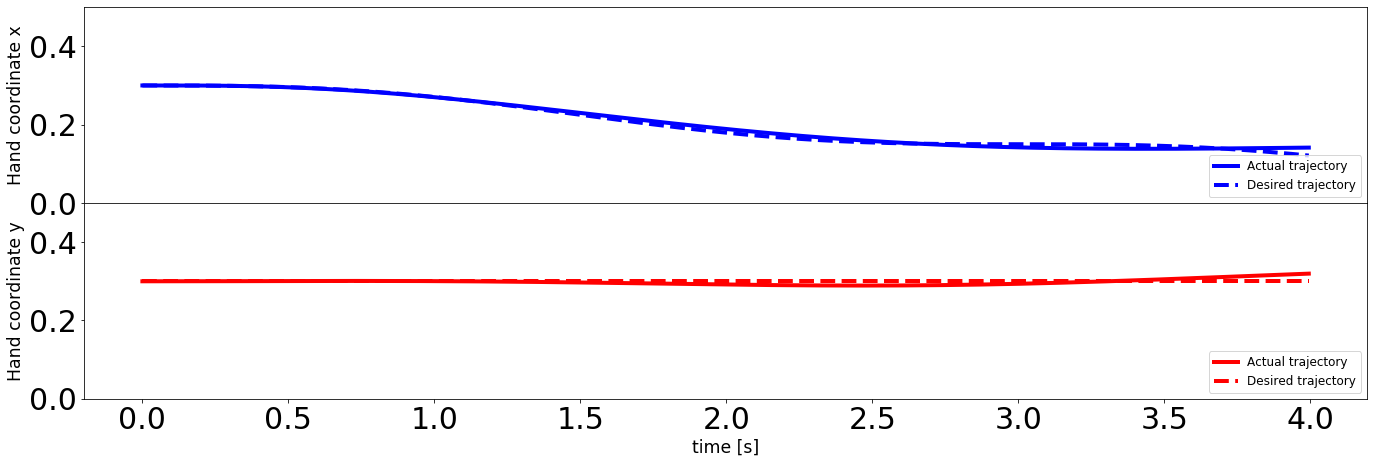

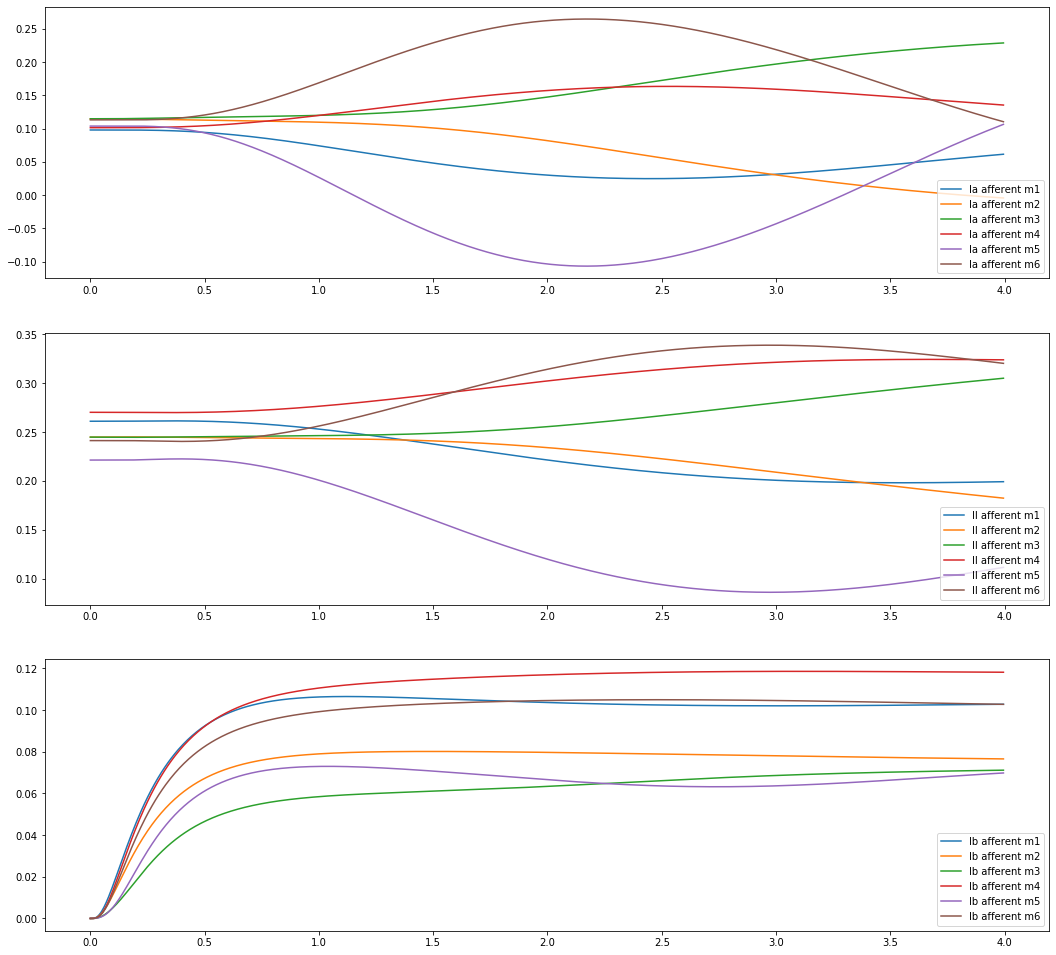

In [7]:
sc.initialize()
sc.update_w(w)
sc.simulate(4.)
error = sc.calc_error(0.15,0.3,4.)
print('Error: ' + str(error))
sc.arm_trajectory(0.15,0.3,4.)
sc.arm_afferent_output()

In [13]:
#w = sc.w_list()
#print(w)

In [ ]:
#syn_idx = sc.syn_list()
#print(syn_idx)

In [8]:
for i,slist in enumerate(sc.net.syns):
    for j,syn in enumerate(slist):
        if syn.port in [0]:
            if hasattr(sc.net.syns[i][j],'plant_out') == False:
                pre_type = sc.net.units[syn.preID].type.name
                post_type = sc.net.units[syn.postID].type.name
                print("%s (%d) --> %s (%d), port:%d, w:%f, delay:%f" 
                      %(pre_type, syn.preID, post_type, syn.postID, syn.port, syn.w, sc.net.delays[i][j]))

presyn_inh_sig (1) --> presyn_inh_sig (0), port:0, w:2.400000, delay:0.005000
presyn_inh_sig (3) --> presyn_inh_sig (0), port:0, w:-2.400000, delay:0.005000
presyn_inh_sig (4) --> presyn_inh_sig (0), port:0, w:-2.400000, delay:0.005000
presyn_inh_sig (16) --> presyn_inh_sig (0), port:0, w:-2.400000, delay:0.005000
presyn_inh_sig (17) --> presyn_inh_sig (0), port:0, w:-2.400000, delay:0.005000
presyn_inh_sig (19) --> presyn_inh_sig (0), port:0, w:2.400000, delay:0.005000
presyn_inh_sig (6) --> presyn_inh_sig (0), port:0, w:2.400000, delay:0.005000
presyn_inh_sig (7) --> presyn_inh_sig (0), port:0, w:2.400000, delay:0.005000
presyn_inh_sig (9) --> presyn_inh_sig (0), port:0, w:-2.400000, delay:0.005000
presyn_inh_sig (21) --> presyn_inh_sig (0), port:0, w:2.400000, delay:0.005000
presyn_inh_sig (22) --> presyn_inh_sig (0), port:0, w:2.400000, delay:0.005000
presyn_inh_sig (24) --> presyn_inh_sig (0), port:0, w:-2.400000, delay:0.005000
presyn_inh_sig (3) --> presyn_inh_sig (2), port:0, w

In [35]:
#sc.net.plants[0].type.name
#sc.net.units[0].type.name

[[ 0.          2.4         0.         -2.4        -2.4         0.
   2.4         2.4         0.         -2.4         0.          0.
   0.          0.          0.          0.         -2.4        -2.4
   0.          2.4         0.          2.4         2.4         0.
  -2.4         0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.          0.         -2.          0.          0.
   0.          1.          0.          0.          0.          0.
   0.          0.          0.          0.          0.         -2.
   0.          0.          0.          0.          1.          0.
   0.          0.          0.          0.          0.    

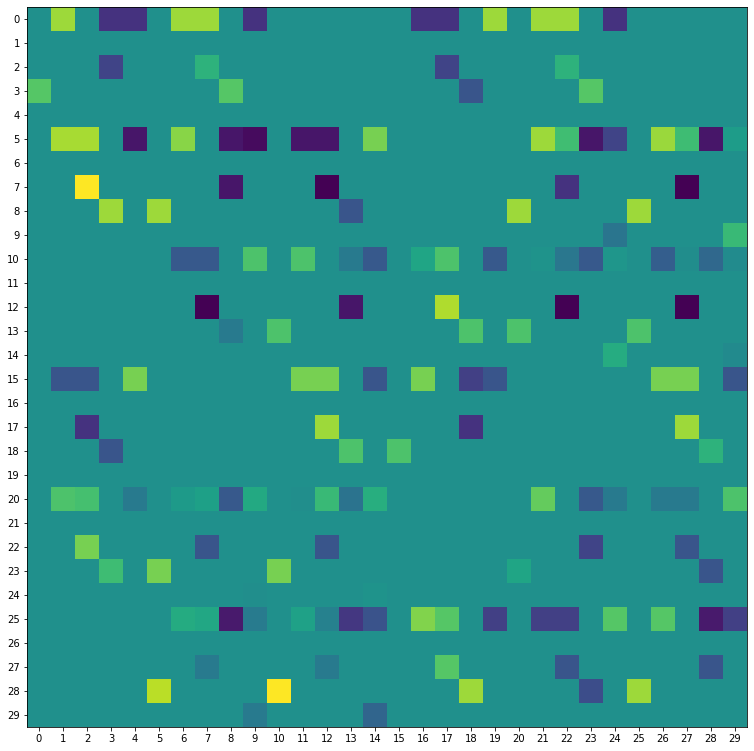

In [9]:
# Creating a numpy 2D array weights that contains all the synaptic weights 
# and ploting the connection matrix as an image

N = 30 # number of neuronal units
#N = len(sc.net.units) # number of units
weights = np.zeros((N,N)) 

for i,slist in enumerate(sc.net.syns):
    for j,syn in enumerate(slist):
        if syn.port in [0]:
            if hasattr(sc.net.syns[i][j],'plant_out') == False:
                weights[syn.postID, syn.preID] = syn.w
                
print(weights)

fig_ex1 = plt.figure(figsize=(10,10))
ax = fig_ex1.add_axes([0., 0., 1., 1.], aspect=1)
ax.set_xticks(list(range(N)))
ax.set_yticks(list(range(N)))
ax.imshow(weights)
plt.show()

In [10]:
weights

array([[ 0.        ,  2.4       ,  0.        , -2.4       , -2.4       ,
         0.        ,  2.4       ,  2.4       ,  0.        , -2.4       ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -2.4       , -2.4       ,  0.        ,  2.4       ,
         0.        ,  2.4       ,  2.4       ,  0.        , -2.4       ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , -2.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0